# DS Assignment | Churn Prediction

## About The Data
Attached is a [random sample data](https://docs.google.com/spreadsheets/d/1_Q01kvVn_V_3fUbt-NkPg2I5kPME2_OfnTaJLzd8qXY/edit#gid=1447522361), which contains multiple fields about users:

- customer ID is ID of a customer
- TargetID is whether he churned in next 2 months or not
- variable containing X in its name is indicative of spend on some goods
- other variables are mostly self explanatory
- you can use your logic to create new  variables
- if a variable name ends with \_m0, it means this variable is for last 30 days if it ends with \_m1, it means, this is for last 31 to 60 days period, if it ends with \_m3, it means this is for last 61 to 90 days period


What Is expected

Develop churn model with given data

1. Create a ML model to predict customers, who will churn
1. Document using jupyter notebook
1. Focus on all the relevant steps of model building
1. Keep the code clean, modular and properly committed
1. Share the notebook and csv having userID and predicted targetid from the [validation data](https://docs.google.com/spreadsheets/d/18UV53pcF1qsQiKv2oeNMhT6U_86ilhQ2ycZNkC4aPR0/edit#gid=1477112248) within two days from now.
1. The final model will be assessed on F1 score on validation data.



In [1]:
# Library for Underdstanding and Manipulationg Data
import pandas as pd # data processing (e.g. pd.read_csv)
import numpy as np # linear algebra
import re
from collections import Counter

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#To ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('DS_dataset.csv') 
df_val = pd.read_csv('validation.csv')
# show the dataframe top 5
df.head(5)

userID  Contact_ind  Customer_status  ActiveSinceDays  num_AcD_m0  \
0   13845            1                3              487           1   
1   38029            1                0             1002           2   
2   43994            1                3              256           5   
3    7735            1                3             1190           7   
4   25444            1                3              781           2   

   num_AcD_m1  r_AcD_m0_m12  r_AcD_m0_m123  daystofirstload  \
0           1     66.666667      50.000000                0   
1           5     66.666667      85.714286                0   
2           4     76.923077      62.500000                0   
3           9     93.333333      61.764706                0   
4           2     57.142857      35.294118                0   

   dayssincelastload  ...  InAllRev_m1  InAllRev_m2  r_InAllRev_m0_m1  \
0                 16  ...       1000.0          0.0          0.000000   
1                194  ...          0.0          0.0          0.000000   
2                 29  ...          0.0       2548.0          0.000000   
3                  3  ...       7636.0       4500.0        137.488543   
4                 59  ...       2000.0       1500.0         74.962519   

   r_InAllRev_m0_m2  tot_InAllRev_3m  OgAllRev_m0  OgAllRev_m1  OgAllRev_m2  \
0          0.000000           1000.0       177.00        300.0        399.0   
1          0.000000              0.0      5700.00      13917.0          0.0   
2          0.000000           2548.0      1068.00        299.0       3058.0   
3        233.281493          22636.0     10389.00       8758.0       5377.0   
4         99.933378           5000.0      1637.87       2759.0       2830.8   

   tot_OgAllRev_3m  targetid  
0           876.00         0  
1         19617.00         1  
2          4425.00         0  
3         24524.00         0  
4          7227.67         0  

[5 rows x 110 columns]

In [3]:
print(df.shape) # row x columns of data
print(df.ndim) # dimension of data
print(df.size) # size of data

(45000, 110)
2
4950000


In [4]:
df.describe()


userID   Contact_ind  Customer_status  ActiveSinceDays  \
count  45000.000000  45000.000000     45000.000000     45000.000000   
mean   25041.195822      0.889711         2.814467       713.220489   
std    14431.467847      0.313253        15.689957       529.159190   
min        1.000000      0.000000      -999.000000      -999.000000   
25%    12584.750000      1.000000         3.000000       260.000000   
50%    25032.500000      1.000000         3.000000       550.000000   
75%    37544.250000      1.000000         4.000000      1081.000000   
max    50000.000000      1.000000         4.000000      2999.000000   

         num_AcD_m0    num_AcD_m1  r_AcD_m0_m12  r_AcD_m0_m123  \
count  45000.000000  45000.000000  45000.000000   45000.000000   
mean       4.385089      4.603356    112.648446     118.468647   
std        3.856362      4.183600    104.957227     102.317085   
min        1.000000      0.000000      4.444444       4.285714   
25%        2.000000      2.000000     55.555556      60.000000   
50%        3.000000      3.000000     88.888889      95.454545   
75%        6.000000      6.000000    133.333333     150.000000   
max       30.000000     31.000000   3600.000000    2550.000000   

       daystofirstload  dayssincelastload  ...    InAllRev_m1    InAllRev_m2  \
count     45000.000000       45000.000000  ...   45000.000000   45000.000000   
mean        135.516911          30.327956  ...    2718.702036    2390.171991   
std         400.185235         184.400482  ...   10186.519593    7148.565788   
min        -999.000000        -999.000000  ...       0.000000       0.000000   
25%           0.000000           9.000000  ...       0.000000       0.000000   
50%           3.000000          39.000000  ...     300.000000     408.000000   
75%         156.000000          94.000000  ...    1600.205000    1741.087500   
max        2569.000000         246.000000  ...  718900.000000  556440.000000   

       r_InAllRev_m0_m1  r_InAllRev_m0_m2  tot_InAllRev_3m   OgAllRev_m0  \
count      4.500000e+04      4.500000e+04     4.500000e+04  4.500000e+04   
mean       4.901471e+04      6.545325e+04     7.909437e+03  3.396933e+03   
std        4.442160e+05      6.112116e+05     2.413073e+04  1.275428e+04   
min        0.000000e+00      0.000000e+00     0.000000e+00  5.000000e-01   
25%        0.000000e+00      0.000000e+00     4.990000e+02  2.790000e+02   
50%        3.331113e+01      3.223729e+01     1.731000e+03  7.467750e+02   
75%        2.044804e+02      2.288739e+02     6.337390e+03  2.400000e+03   
max        2.210620e+07      6.506785e+07     2.342540e+06  1.152048e+06   

         OgAllRev_m1    OgAllRev_m2  tot_OgAllRev_3m      targetid  
count   45000.000000   45000.000000     4.500000e+04  45000.000000  
mean     3182.273750    2811.989288     9.391196e+03      0.203044  
std     10710.336636    8130.998706     2.732669e+04      0.402270  
min         0.000000       0.000000     1.000000e+00      0.000000  
25%       199.000000     100.000000     1.165875e+03      0.000000  
50%       733.000000     626.100000     2.800450e+03      0.000000  
75%      2387.000000    2305.250000     8.628410e+03      0.000000  
max    760763.250000  703016.000000     2.577306e+06      1.000000  

[8 rows x 110 columns]

* The table above has a statistical summary of the dataset.
* It contains number, mean, standard deviation, minimum and maximum values for each feature.
* Although the values in the table provide a summary of the data set, they do not make sense for the machine learning model.

In [5]:
# Checking Column Details to a list
df.columns.to_list()

['userID',
 'Contact_ind',
 'Customer_status',
 'ActiveSinceDays',
 'num_AcD_m0',
 'num_AcD_m1',
 'r_AcD_m0_m12',
 'r_AcD_m0_m123',
 'daystofirstload',
 'dayssincelastload',
 'tot_RevUo_m0',
 'tot_RevUo_m1',
 'tot_RevUo_m2',
 'r_tot_RevUo_m0_m1',
 'r_tot_RevUo_m1_m2',
 'r_tot_RevUo_m0_m12',
 'avg_RevUo_m0',
 'avg_RevUo_m1',
 'avg_RevUo_m2',
 'chg_RevUo_l0_1m',
 'chg_RevUo_l1_2m',
 'chg_RevUo_l2_3m',
 'tot_LdCnt_m0',
 'tot_LdCnt_m1',
 'tot_LdCnt_m2',
 'max_RevUo_m0',
 'max_RevUo_m1',
 'max_RevUo_m2',
 'r_avg_RevUo_m0_m1',
 'r_avg_RevUo_m1_m2',
 'avgdays_btw_loads_l6',
 'tot_failed_LdTxnCnt_3m',
 'r_failed_LdTxnCnt_m0_m12',
 'tot_rtlX_m0',
 'tot_rtlX_m1',
 'tot_rtlX_m2',
 'r_tot_rtlX_m0_m1',
 'r_tot_rtlX_m1_m2',
 'r_tot_rtlX_m0_m12',
 'avg_rtlX_m0',
 'avg_rtlX_m1',
 'avg_rtlX_m2',
 'max_rtlX_m0',
 'max_rtlX_m1',
 'max_rtlX_m2',
 'r_avg_max_rtlX_m0',
 'r_avg_max_rtlX_m1',
 'RtlTxns_cnt_m0',
 'RtlTxns_cnt_m1',
 'RtlTxns_cnt_m2',
 'r_RtlTxns_cnt_m0_m1',
 'r_RtlTxns_cnt_m1_m2',
 'sum_r_RtlTx

In [6]:
# We want to observe the types of variables in the dataset and whether they contain null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Columns: 110 entries, userID to targetid
dtypes: float64(65), int64(45)
memory usage: 37.8 MB


In [7]:
# from the data description, we can see that user_id is unique - therefor it not provides us information we can learn.
df.drop(["userID"], axis = 1, inplace=True)

In [8]:
# Checking Unique Values
unique_df = pd.DataFrame(df.nunique(),columns=['Unique_Value'])
unique_df

Unique_Value
Contact_ind                 2
Customer_status             6
ActiveSinceDays          2349
num_AcD_m0                 30
num_AcD_m1                 32
...                       ...
OgAllRev_m0             14489
OgAllRev_m1             14474
OgAllRev_m2             14305
tot_OgAllRev_3m         24495
targetid                    2

[109 rows x 1 columns]

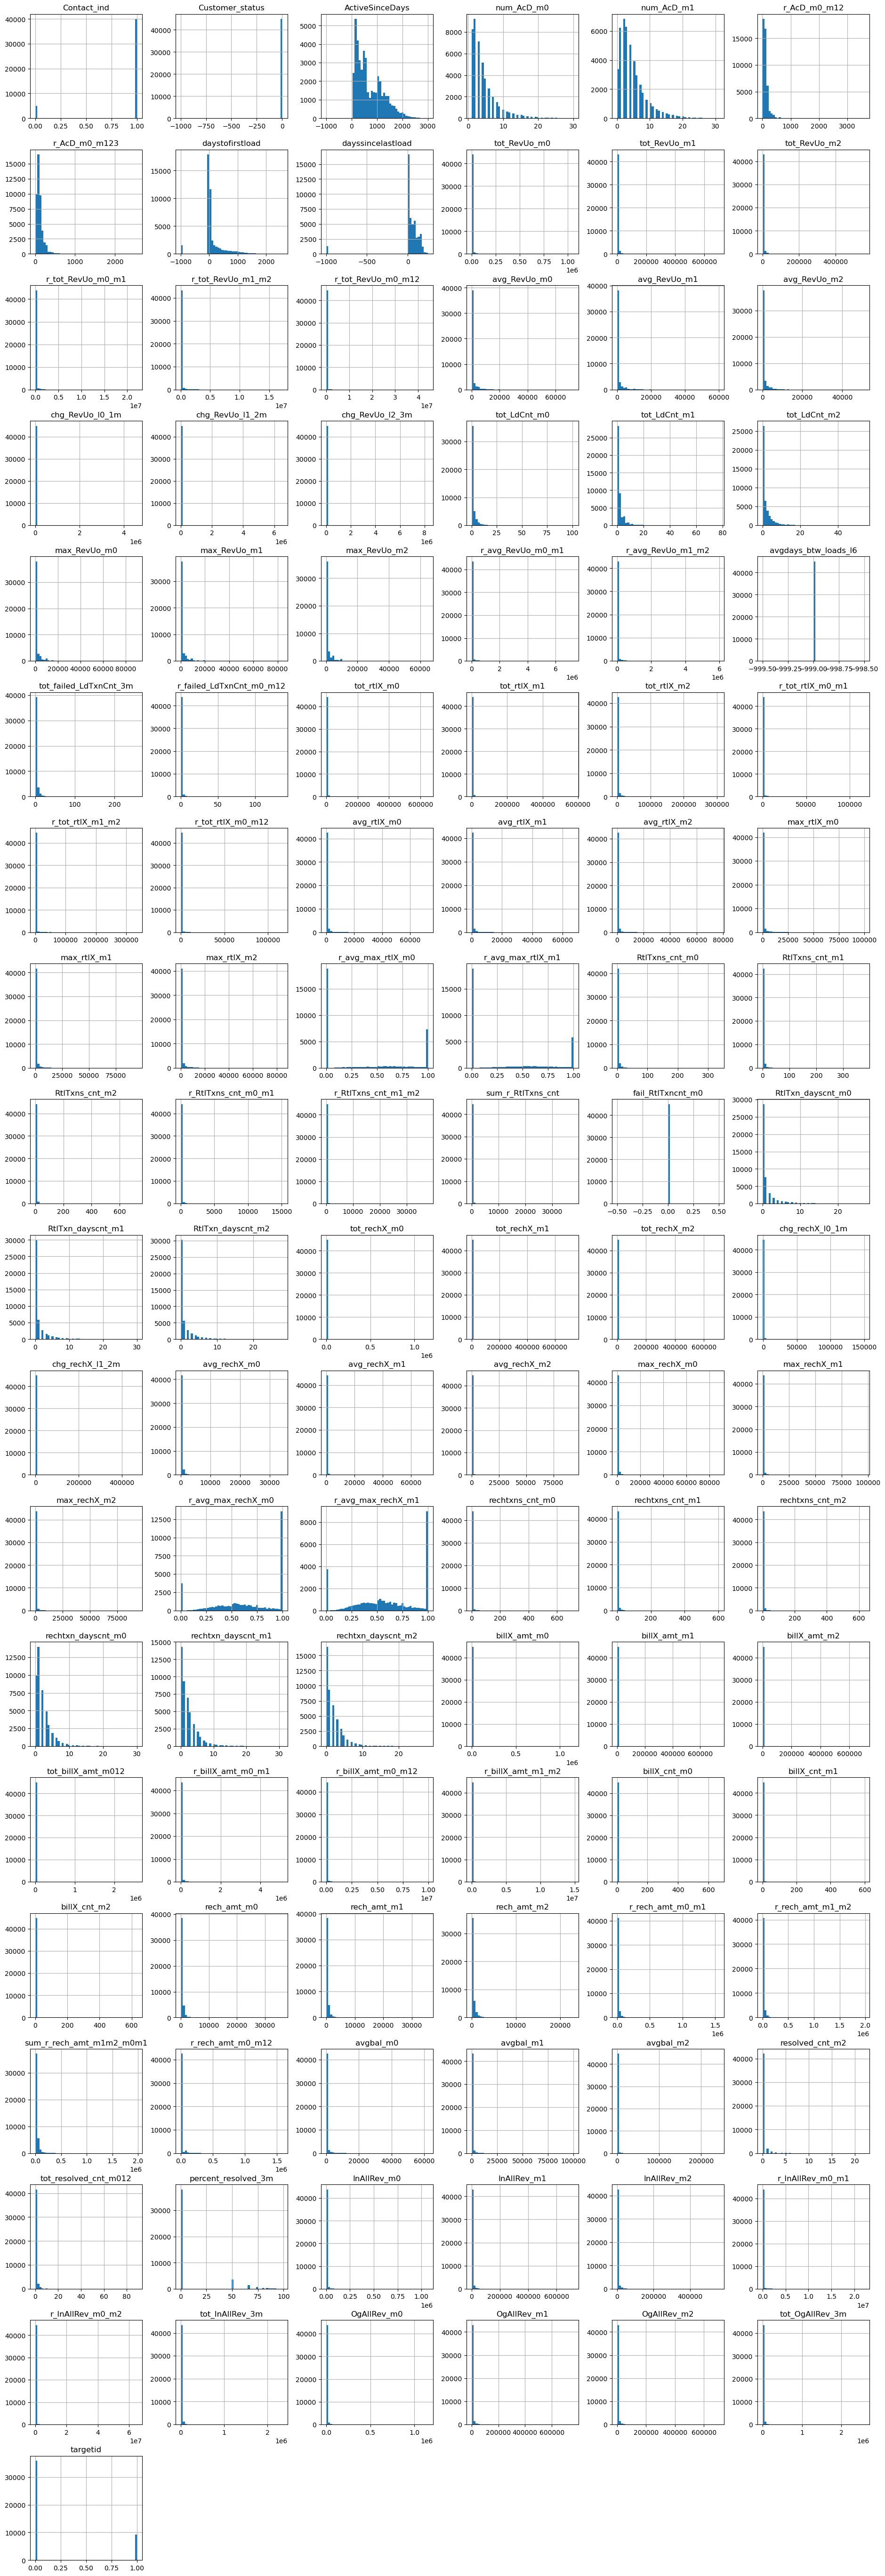

In [9]:
## Checking Data Distribution
df.iloc[:,:].hist(bins=50,figsize=(23,74),layout=(20,6))
plt.show()

In [10]:
#Basic Data Analysis
stay = df[(df['targetid'] ==0) ].count()[1]
churn = df[(df['targetid'] ==1) ].count()[1]
print ("num of pepole who stay: "+ str(stay))
print ("num of pepole who churn: "+ str(churn))

num of pepole who stay: 35863
num of pepole who churn: 9137


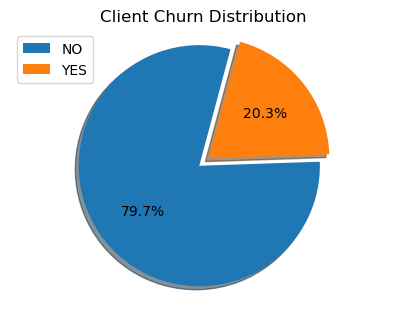

In [11]:
# ratio of those who churn and those who don't
sizes = df['targetid'].value_counts()
labels='NO','YES'
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Client Churn Distribution")
ax1.legend(labels)
plt.gcf().set_size_inches(5,3.5)
plt.show()

### Missing Value
* Find Missing Value
* Fill Missing Value

In [12]:
#Find Missing Value
misssing_col = df.columns[df.isnull().any()]
misssing_col

Index(['r_avg_max_rtlX_m0', 'r_avg_max_rtlX_m1', 'r_avg_max_rechX_m0',
       'r_avg_max_rechX_m1'],
      dtype='object')

In [13]:
# Features with missing values
miss = df.isnull().sum().sort_values(ascending = False).head(5)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

No. missing values  % of missing data
r_avg_max_rtlX_m1                11138          24.751111
r_avg_max_rechX_m1               10578          23.506667
r_avg_max_rtlX_m0                 9786          21.746667
r_avg_max_rechX_m0                6180          13.733333
rechtxns_cnt_m0                      0           0.000000

In [14]:
df[['r_avg_max_rtlX_m0', 'r_avg_max_rtlX_m1', 'r_avg_max_rechX_m0',
       'r_avg_max_rechX_m1','targetid']].corr()

r_avg_max_rtlX_m0  r_avg_max_rtlX_m1  r_avg_max_rechX_m0  \
r_avg_max_rtlX_m0            1.000000           0.885357           -0.252127   
r_avg_max_rtlX_m1            0.885357           1.000000           -0.129954   
r_avg_max_rechX_m0          -0.252127          -0.129954            1.000000   
r_avg_max_rechX_m1          -0.161503          -0.092992            0.632429   
targetid                     0.036503          -0.000827            0.073243   

                    r_avg_max_rechX_m1  targetid  
r_avg_max_rtlX_m0            -0.161503  0.036503  
r_avg_max_rtlX_m1            -0.092992 -0.000827  
r_avg_max_rechX_m0            0.632429  0.073243  
r_avg_max_rechX_m1            1.000000 -0.025931  
targetid                     -0.025931  1.000000

In [15]:
df.r_avg_max_rechX_m0.value_counts()

1.000000    13363
0.000000     3718
0.750000      233
0.666667      180
0.833333      142
            ...  
0.565385        1
0.827273        1
0.471130        1
0.591500        1
0.350229        1
Name: r_avg_max_rechX_m0, Length: 14539, dtype: int64

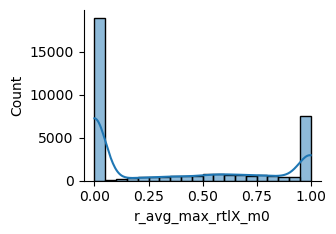

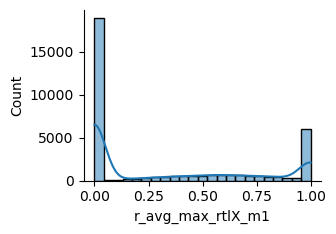

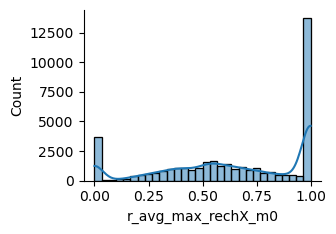

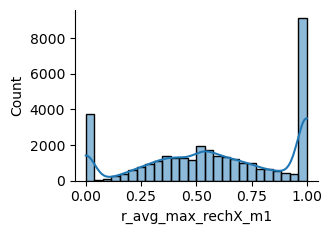

In [16]:
for i in misssing_col:
    sns.displot(x=df[i], kde=True)
    plt.gcf().set_size_inches(3,2)
plt.show()

In [17]:
df[misssing_col].describe()

r_avg_max_rtlX_m0  r_avg_max_rtlX_m1  r_avg_max_rechX_m0  \
count       35214.000000       33862.000000        38820.000000   
mean            0.354847           0.324456            0.656462   
std             0.423608           0.406749            0.332003   
min             0.000000           0.000000            0.000000   
25%             0.000000           0.000000            0.422348   
50%             0.000000           0.000000            0.679182   
75%             0.820490           0.704371            1.000000   
max             1.000000           1.000000            1.000000   

       r_avg_max_rechX_m1  
count        34422.000000  
mean             0.596932  
std              0.329269  
min              0.000000  
25%              0.366667  
50%              0.592070  
75%              1.000000  
max              1.000000

In [18]:
df[misssing_col] = df[misssing_col].fillna(df[misssing_col].mean())

In [19]:
# Check top 5 Missing Values columns
# Features with missing values
miss = df.isnull().sum().sort_values(ascending = False).head(5)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

No. missing values  % of missing data
Contact_ind                          0                0.0
rechtxns_cnt_m0                      0                0.0
r_billX_amt_m0_m12                   0                0.0
r_billX_amt_m0_m1                    0                0.0
tot_billX_amt_m012                   0                0.0

In [20]:
#Total sum of any mising values
sum(df.isnull().sum()>0)

0

### Visualization

#### Box plot of numerical features


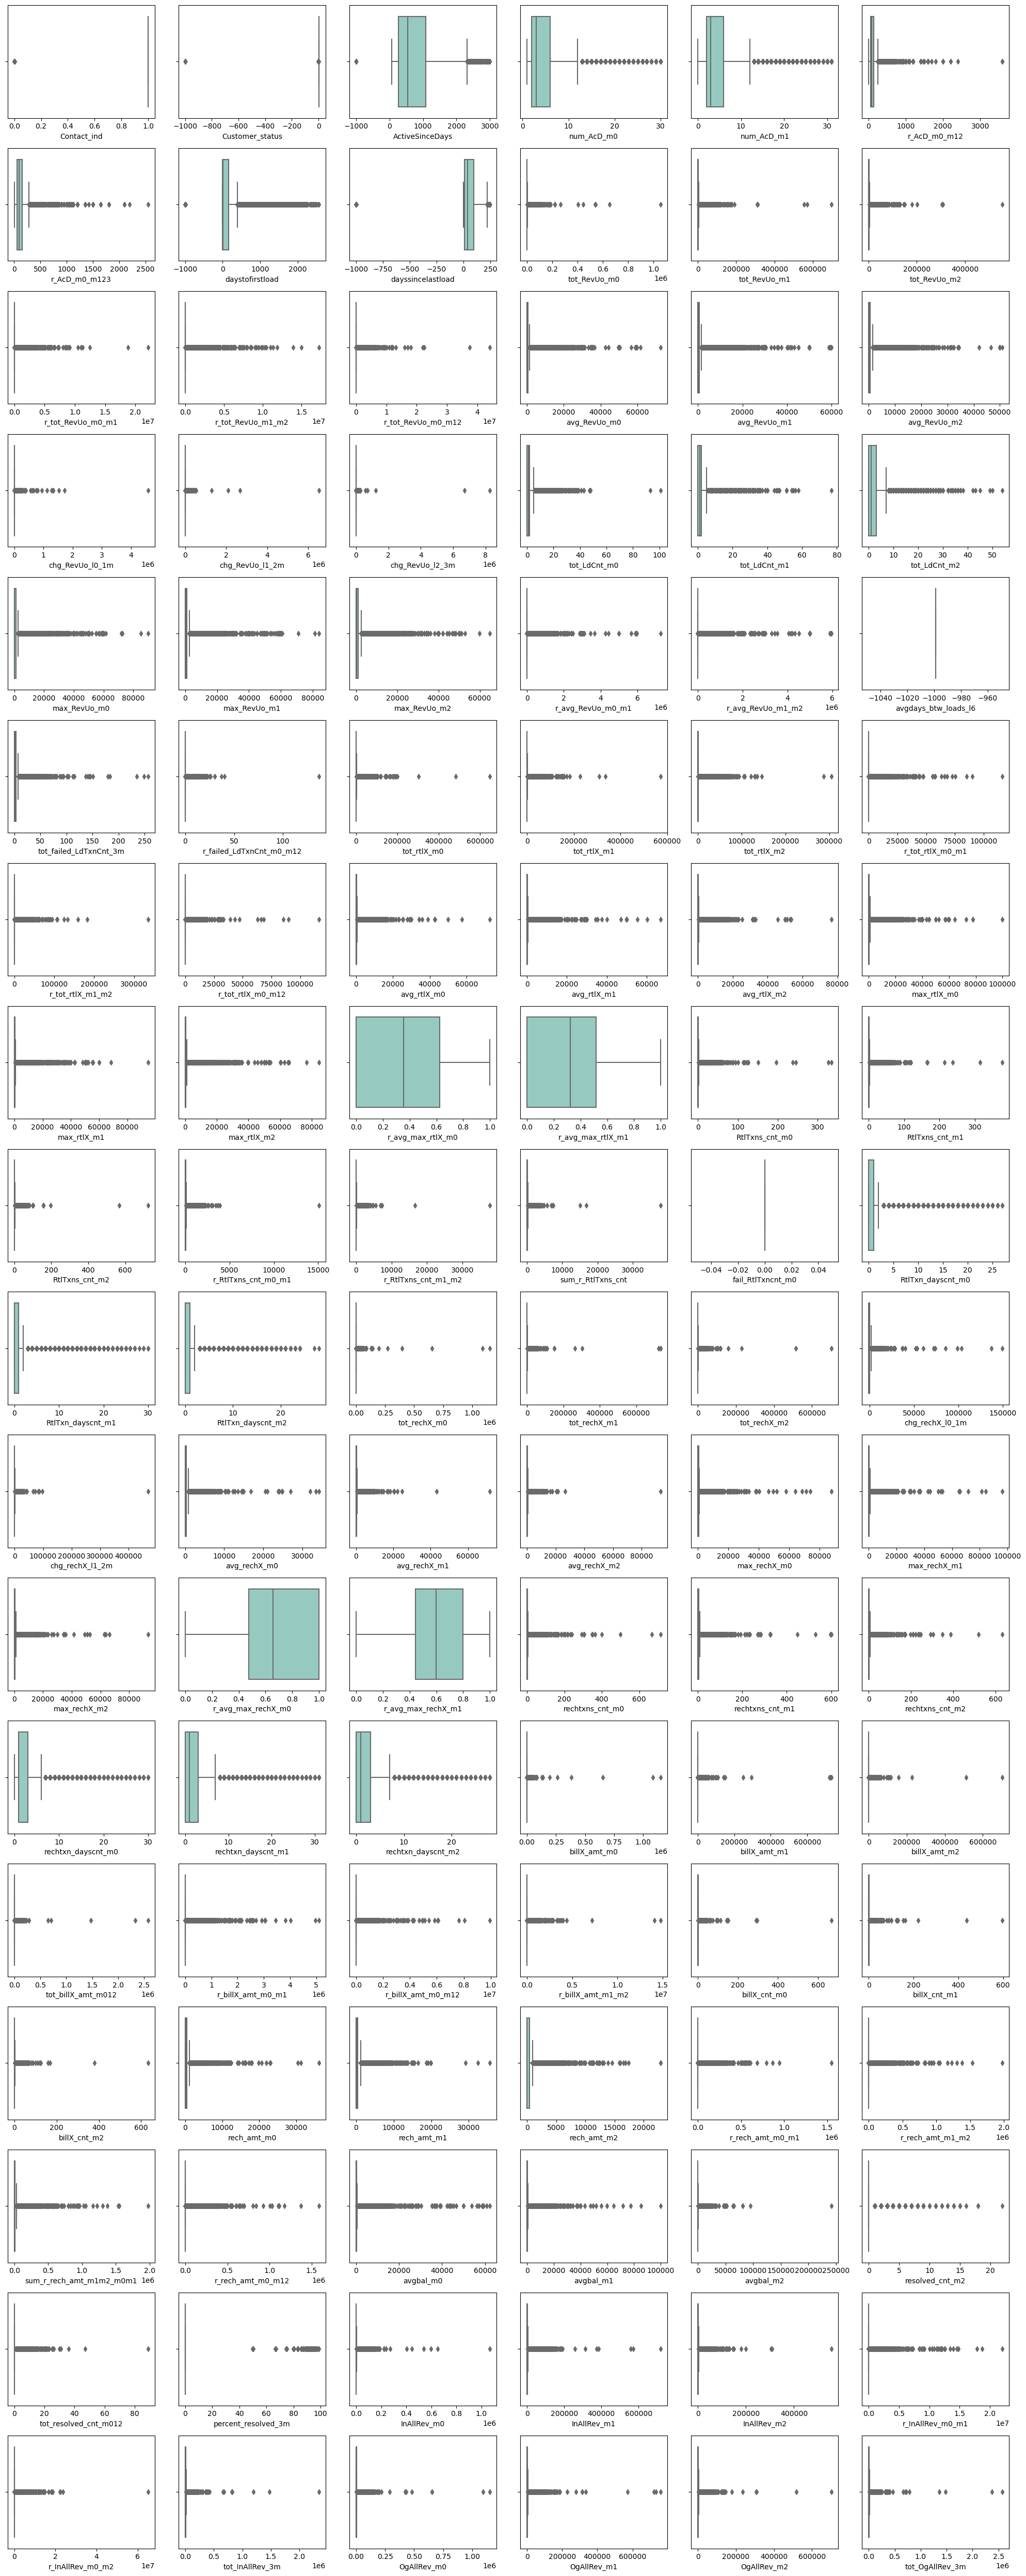

In [21]:
# Box plot of numerical features
fig, ax = plt.subplots(18, 6, figsize = (20, 50))
ax = ax.flatten()
for i, c in enumerate(df.loc[:, df.columns != 'targetid'].columns.to_list()):
    sns.boxplot(x = df[c], ax = ax[i], palette = 'Set3')
fig.tight_layout()

## Features Details:
1. ActiveSinceDays : values are Days since when user is active on the platform.
1. Contact_ind : Indicator whether customer's contact number is available at the platform or not.
1. Customer_status : Activity status of the customer.
1. avgdays_btw_loads_l6 : Average of number of days between load in 6th month.
1. dayssincelastload : Number of days since when the customer did last loading.
1. daystofirstload : Number of days since when customer did loading for the first time.

***Remarks***

After glancing through all the varibales, it is evident that these are not the base features (raw faetures). 
* These features have been derived out of the raw data and also, some modeling has already been performed upon it to collate the best features. avgdays_btw_loads_l6 is an example of best feature of model because, none of the other avgdays_btw_loads_* (l1,l2,l3,l4,l5 etc.) is present in data. other exmaples are some of the ratio related features.
* Customers are as old as 8.5 years and the most new customer is 72 days old & on an averge customer is 2 year old.
* There are 5 classes of activity status defined by the business for a customer.


*Rest all features are with respect to load. Don't know exactly what it means w.r.t to transaction, churn, or onboarding either. But let's guess business meaning of the feature beyond loading. Assuming load means when customer loads its shopping cart.*

### Correlation Matrix for different Features

### Outlier Detection

In [ ]:
# ACD, LD & RESOLVE Analysis
alr_columns =  [i for i in df.columns if re.compile(r'acd').search(i.lower()) or re.compile(r'ld').search(i.lower()) or re.compile(r'resolve').search(i.lower()) ]
corr = df[alr_columns].corr()
plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, fmt='.4g')
plt.title("Heatmap ALR Data")
plt.show()

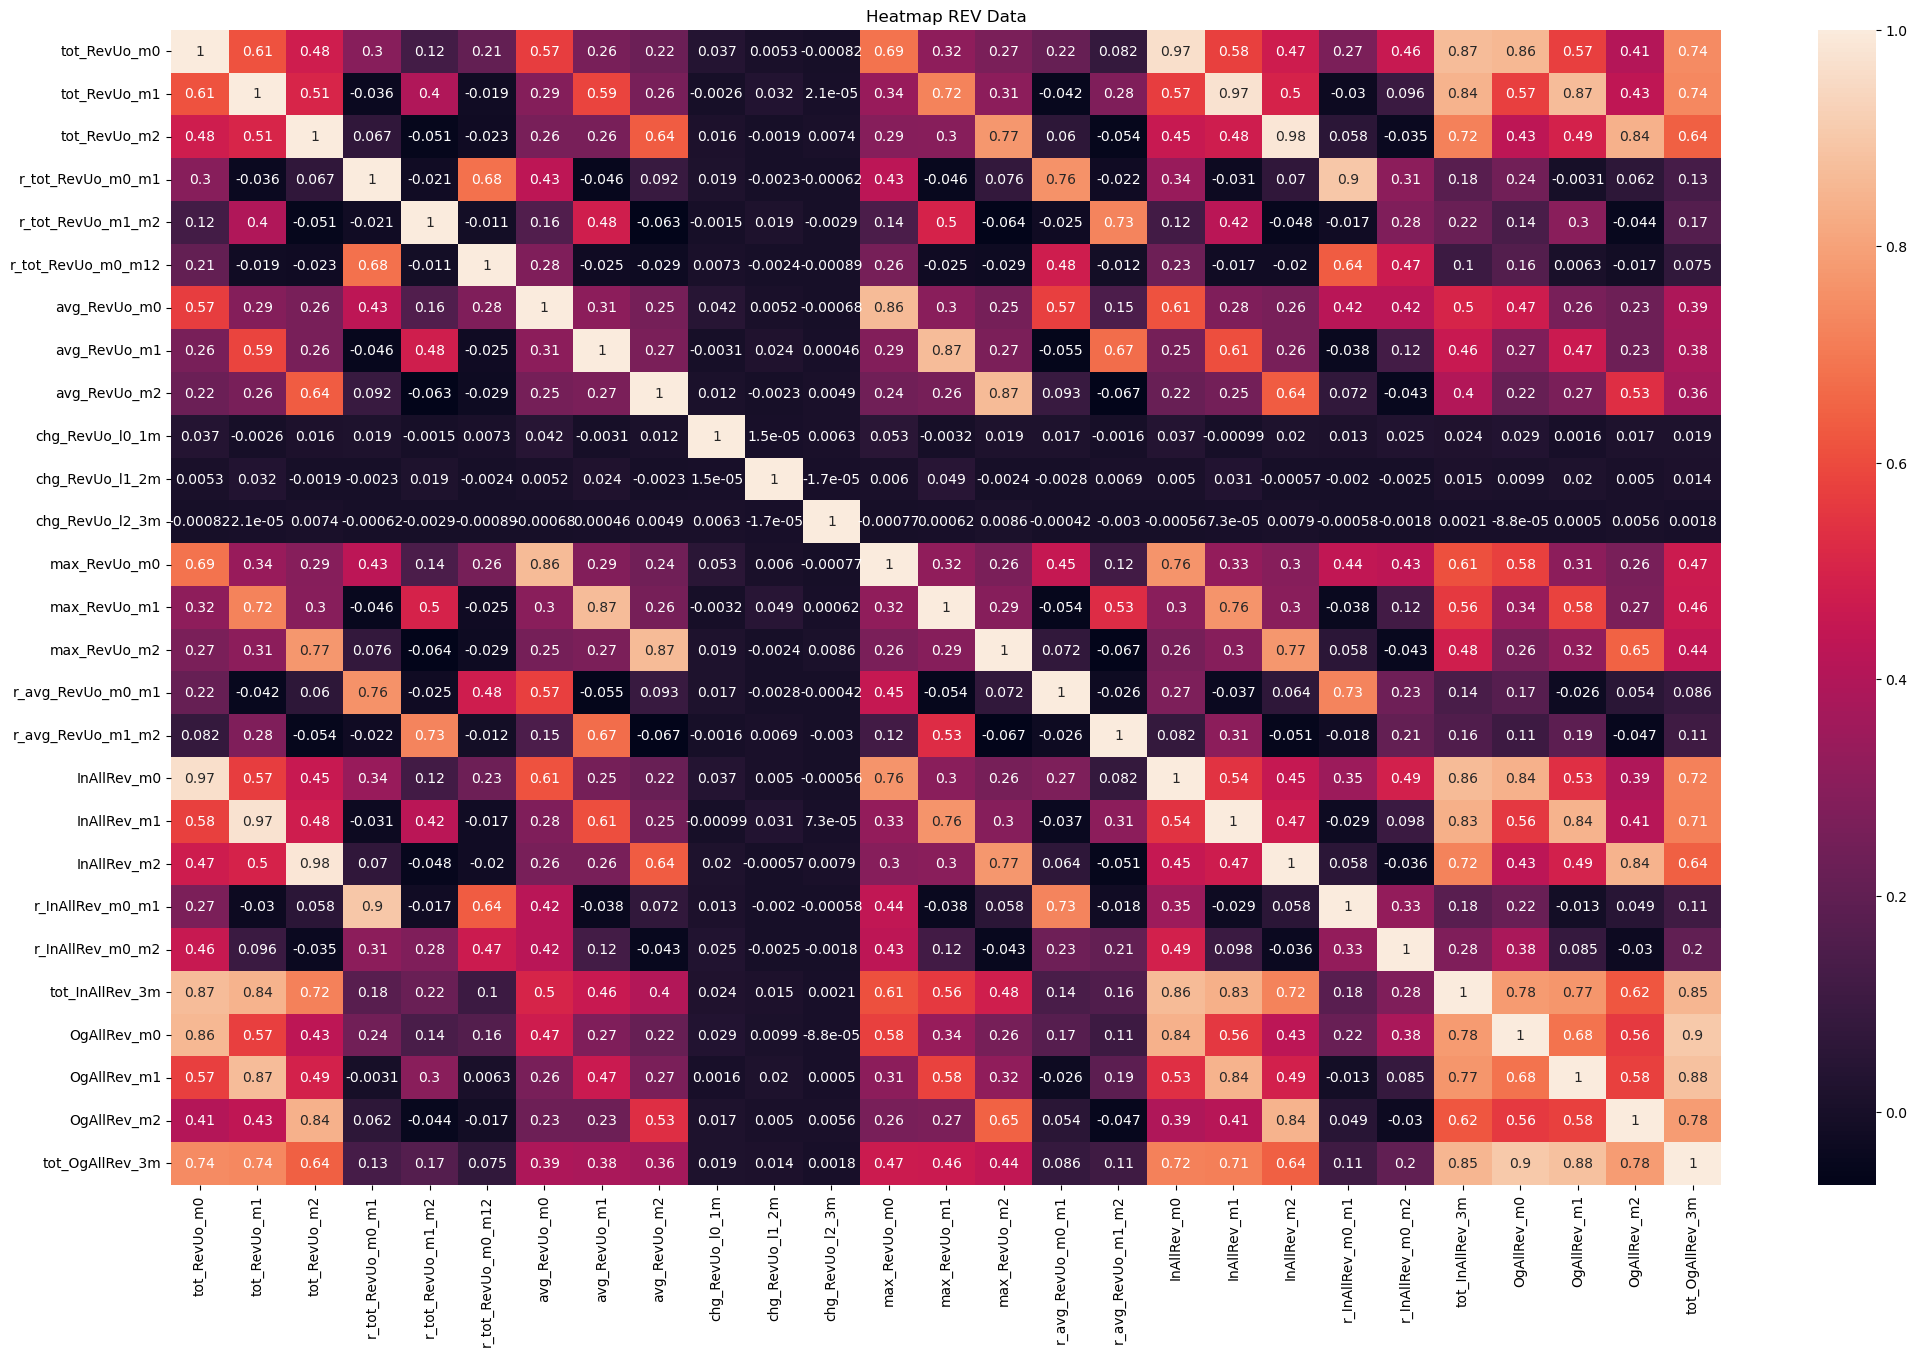

In [23]:
# REV Analysis
rev_columns = []
for i in df.columns:
    if re.compile(r'rev').search(i.lower()):
        rev_columns.append(i)
corr = df[rev_columns].corr()
plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, fmt='.2g')
plt.title("Heatmap REV Data")
plt.show()

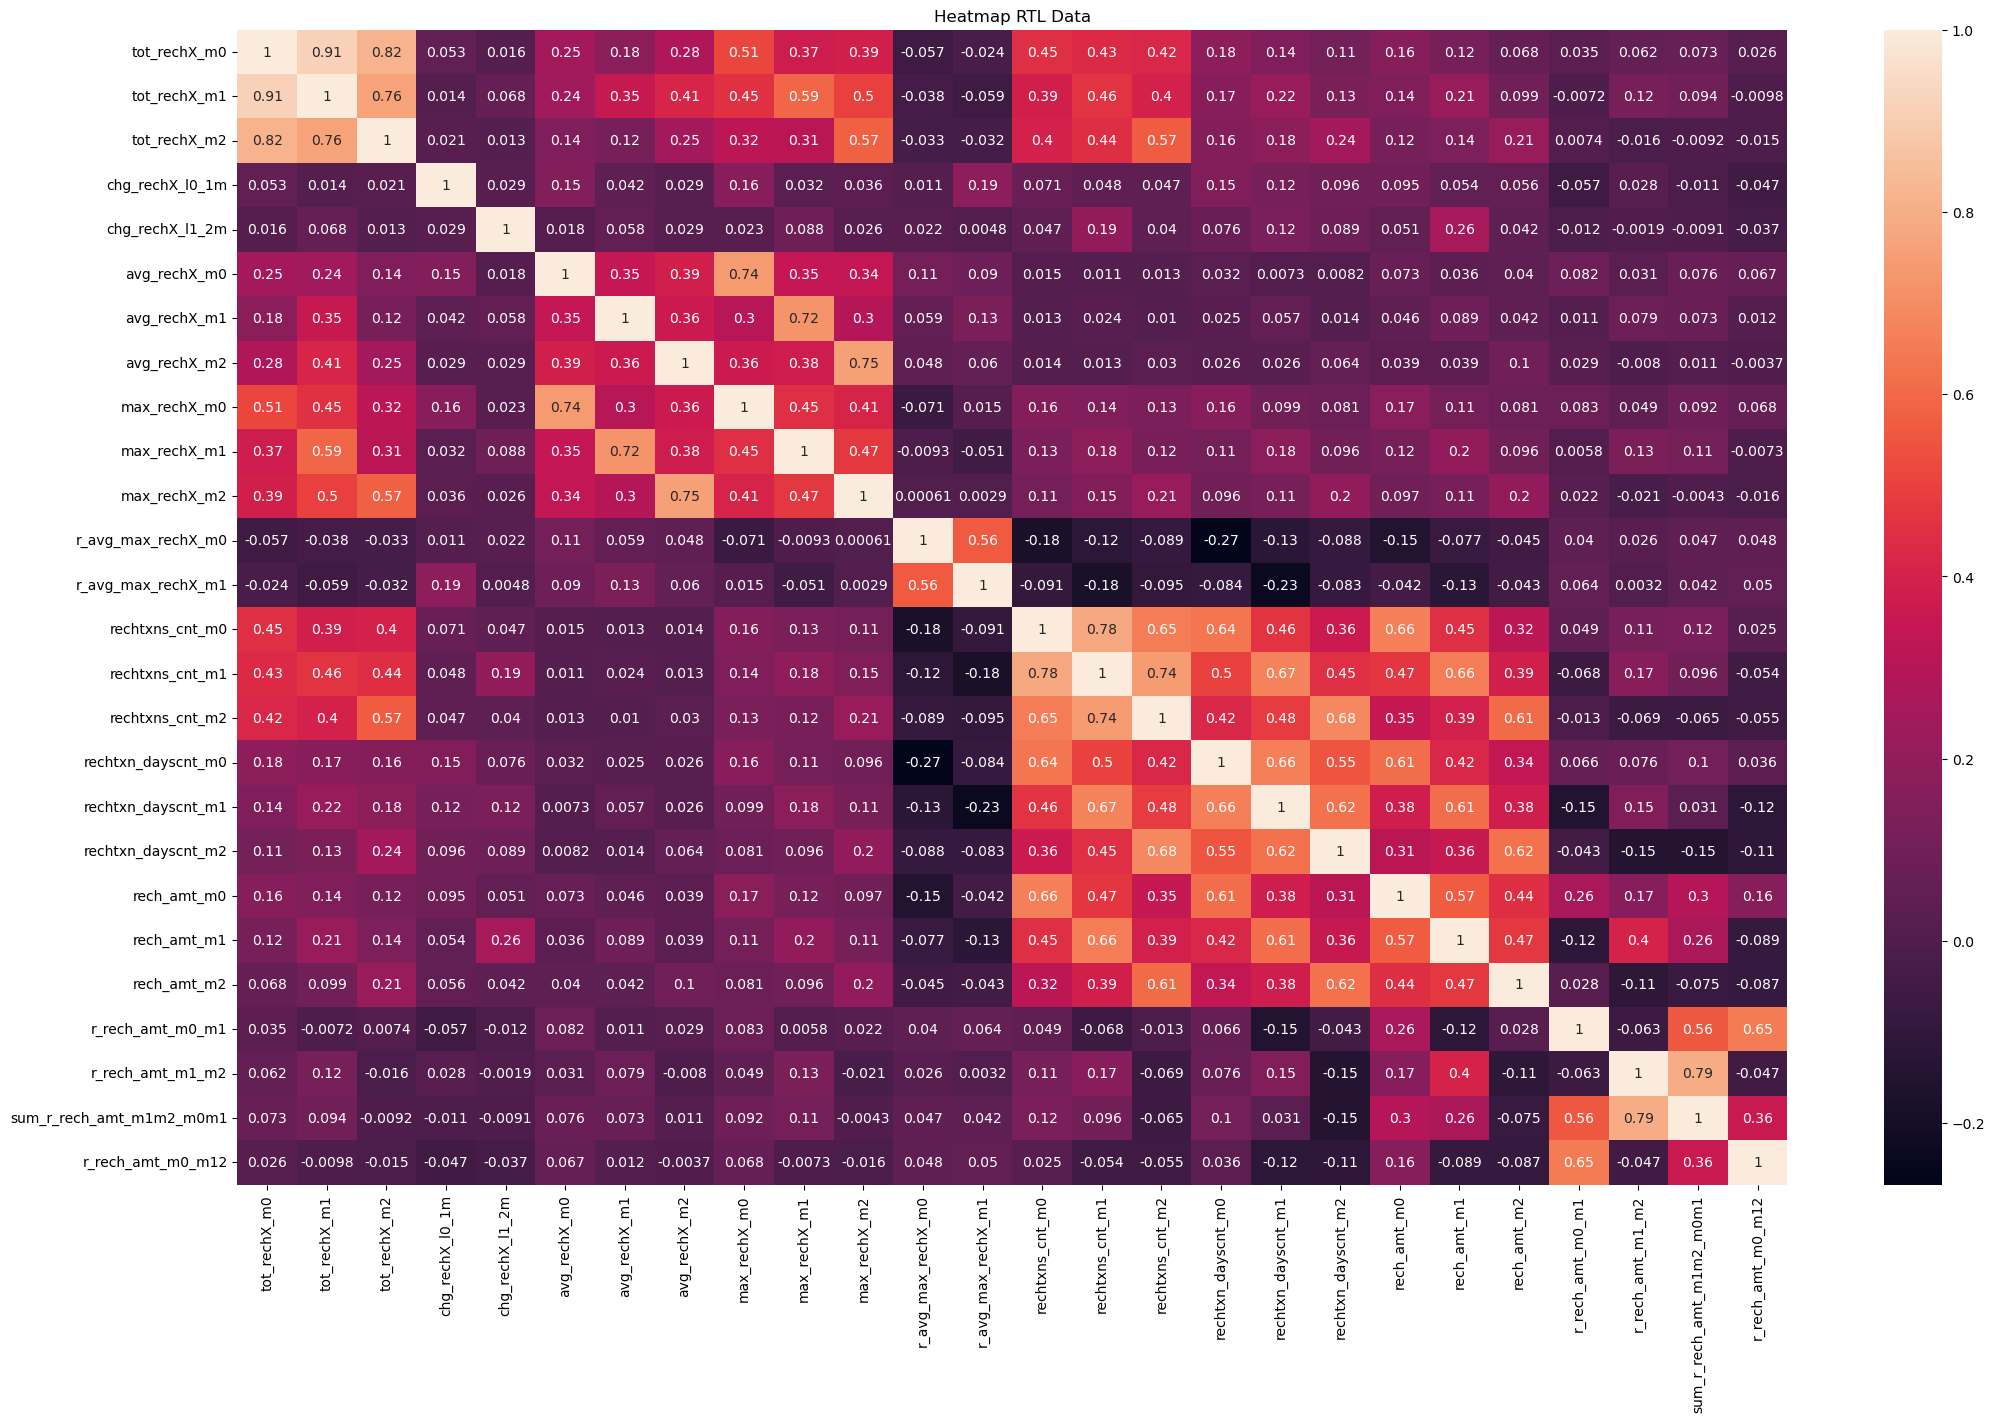

In [24]:
# RECH Analysis
rech_columns = []
for i in df.columns:
    if re.compile(r'rech').search(i.lower()):
        rech_columns.append(i)
corr = df[rech_columns].corr()
plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, fmt='.2g')
plt.title("Heatmap RTL Data")
plt.show()

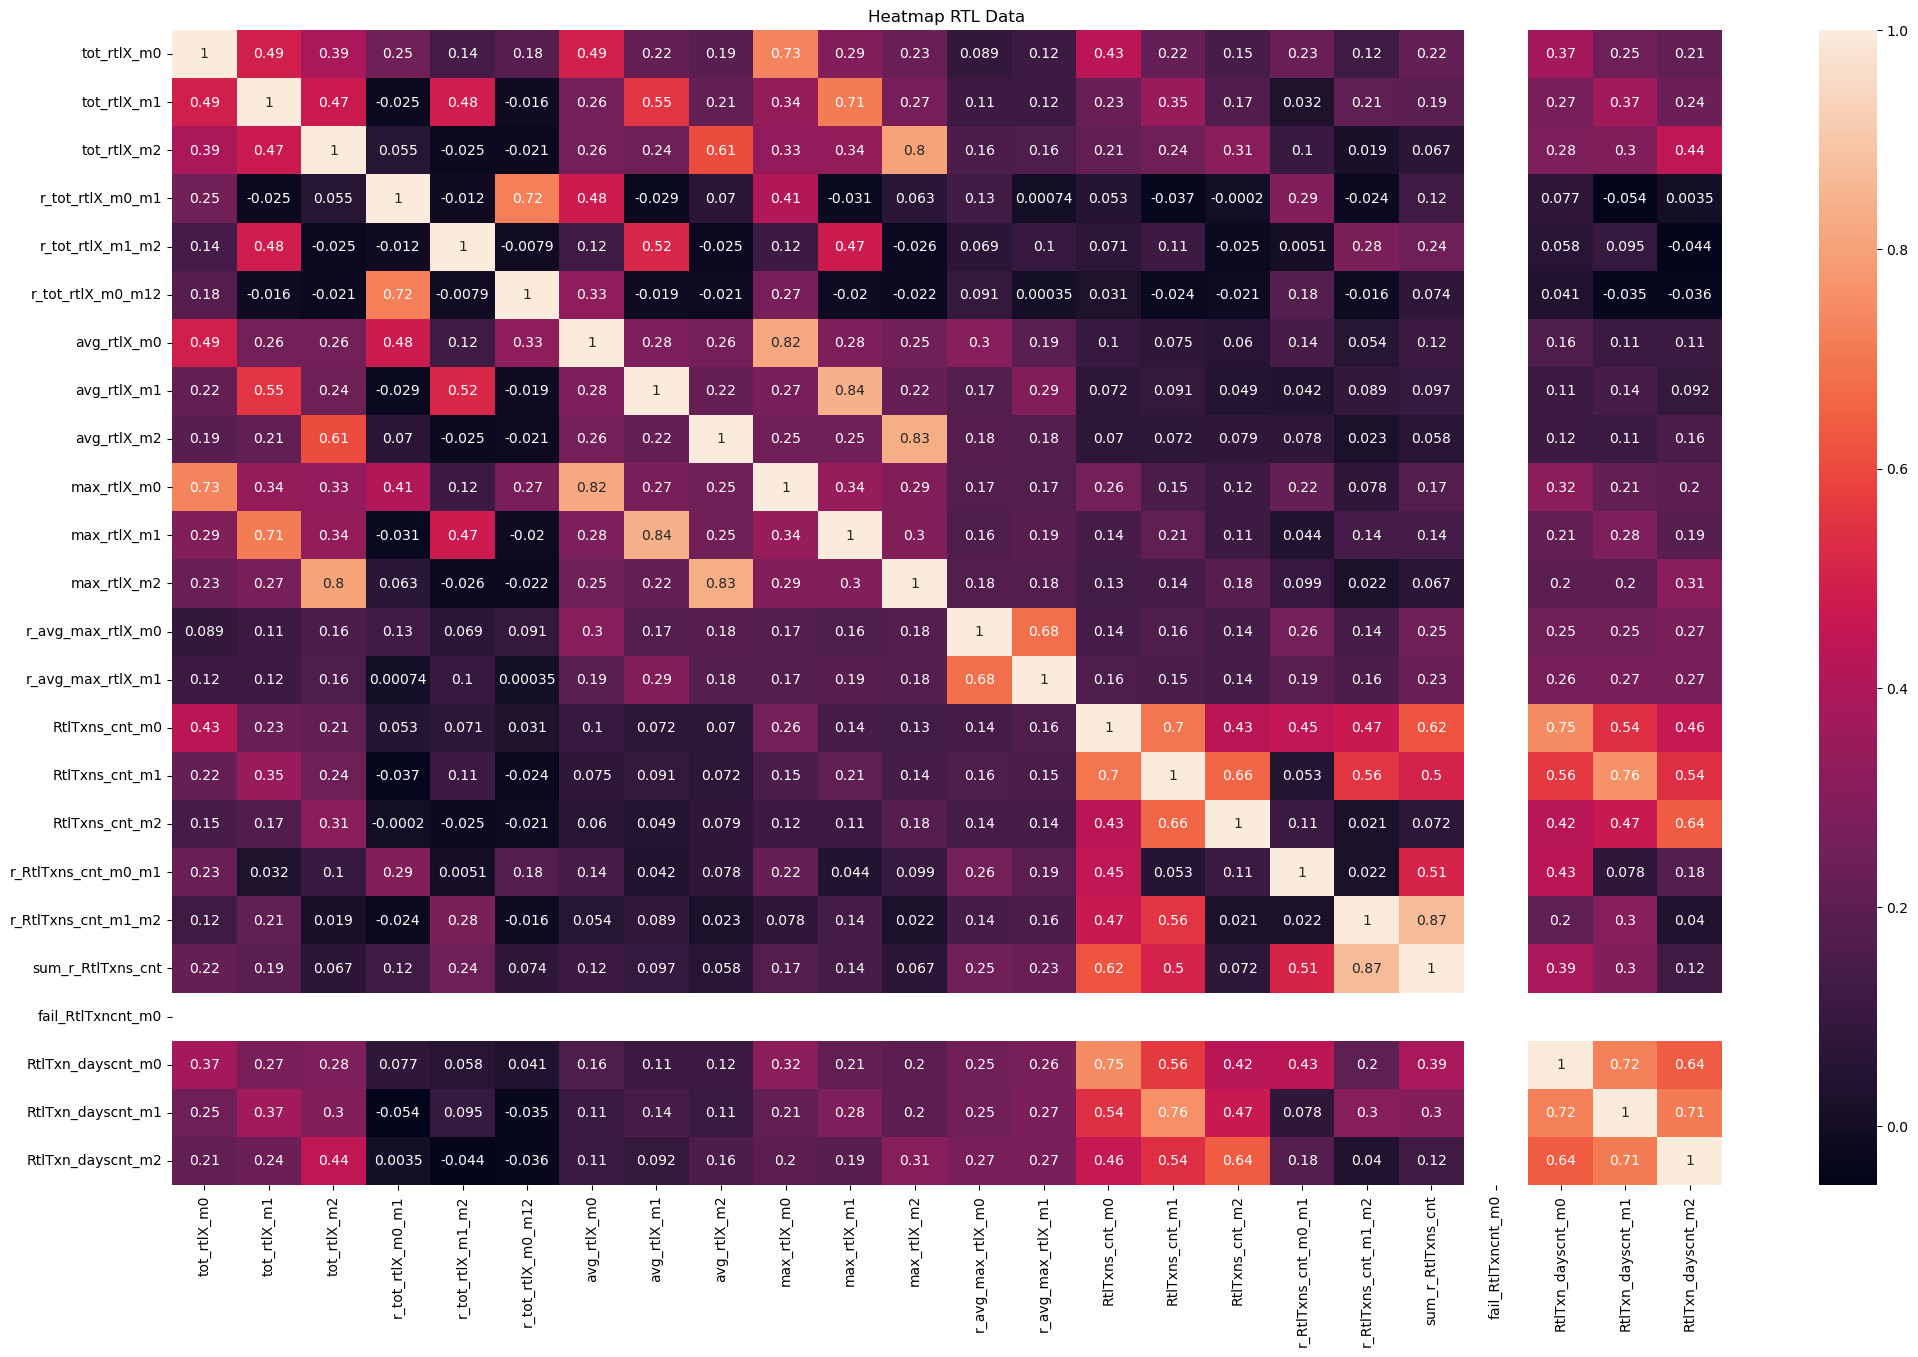

In [25]:
# RTL Analysis
rtl_columns = []
for i in df.columns:
    if re.compile(r'rtl').search(i.lower()):
        rtl_columns.append(i)
corr = df[rtl_columns].corr()
plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, fmt='.2g')
plt.title("Heatmap RTL Data")
plt.show()

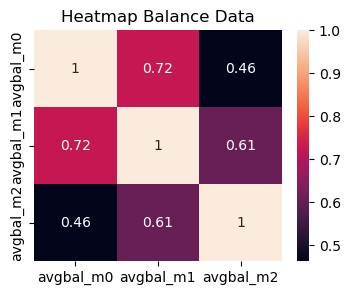

In [26]:
# Balance Analysis
balance_cols = [i for i in df.columns if i.startswith('avgbal')]
corr = df[balance_cols].corr()
plt.subplots(figsize=(4,3)) 
sns.heatmap(corr,annot=True, fmt='.2g')
plt.title("Heatmap Balance Data")
plt.show()

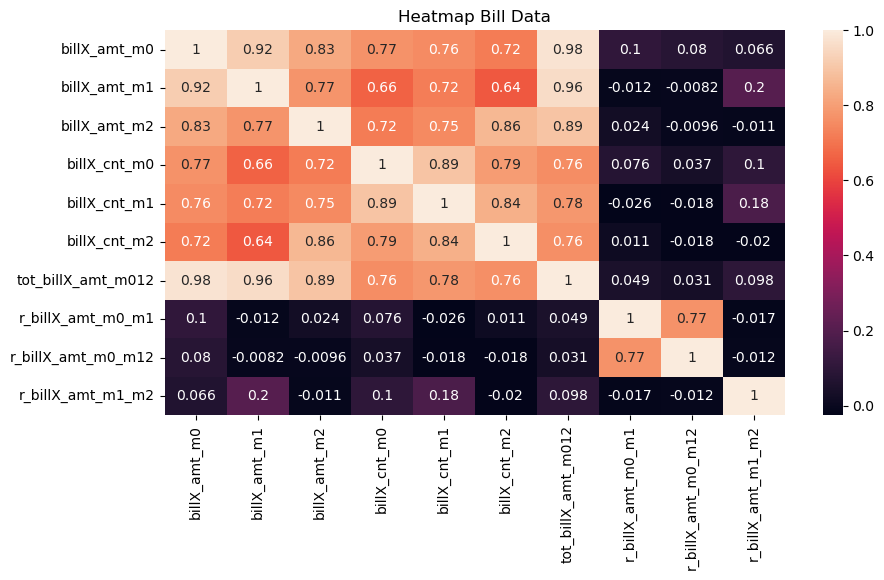

In [27]:
#Bill Amount & Count Analysis
bill_amount_cols = [i for i in df.columns if i.startswith('billX_amt')]
bill_count_cols = [i for i in df.columns if i.startswith('billX_cnt')]
bill_derived_cols = [i for i in df.columns if (i.startswith('r_bill') or i.startswith('tot_bill'))]
corr = df[bill_amount_cols+bill_count_cols+bill_derived_cols].corr()
plt.subplots(figsize=(10,5)) 
sns.heatmap(corr,annot=True, fmt='.2g')
plt.title("Heatmap Bill Data")
plt.show()

***EDA Observations and Next Steps***


- We are going to do cosiderate outlier treatment,as outliers defined above(99th percentile) have significant impact on the target class.
- Drop the identified columns with constant values.
- We need to go ahead with missinig value imputation.
- Linear interactions of the varibale have significant prediction power.
- But, we can not go ahead with linear models, as that will be highly influenced by outliers in the data.
- We will be using following models as part of pipeline :Logistic Regression, RandomForest, GaussianNB, AdaBoostClassifier, GradientBoosting, Adaboost,KNN
- Model optimization method used will be :  BayesianOptimization.
- cross validation will be doone using 5 fold cv.
- data imbalance will be handled using class weight parameters of the models.
- we will be using 3 sets of data for training, testing and validation.


#### Threshold setting based on : Re-call of Churning Class (1) because we need to pick on all actual churners from the platform.

### Outlier Handling
* We need outlier treatment for more generalised model, if target is not significantly influenced by outliers. We will be treating 1% thresold (500 data points) for outlier treatment

* Mirror Image Analysis : Let's see effect of outliers & non-outliers on churning of customer to help us understand whether we need outlier treatment.

In [28]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],99)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 0)
    
    return outlier_indices

In [29]:
df.loc[detect_outliers(df,['daystofirstload','dayssincelastload'])]

Contact_ind  Customer_status  ActiveSinceDays  num_AcD_m0  num_AcD_m1  \
90               1                4              231           1           3   
96               1                4             1673           1           2   
134              0                4              140           1           0   
176              1                3               81           4           4   
226              1                4              109           1           2   
...            ...              ...              ...         ...         ...   
44750            1                1             1683           1           1   
44769            1                3              717           3           3   
44824            1                0              430           1           0   
44870            1                3             1696           1           4   
44986            1                3               77           3           2   

       r_AcD_m0_m12  r_AcD_m0_m123  daystofirstload  dayssincelastload  \
90        50.000000           75.0             -999               -999   
96        50.000000           37.5             -999               -999   
134      200.000000          150.0             -999               -999   
176      160.000000          240.0             -999               -999   
226       50.000000           75.0             -999               -999   
...             ...            ...              ...                ...   
44750    100.000000          150.0             -999               -999   
44769    150.000000          225.0             -999               -999   
44824    100.000000          150.0             -999               -999   
44870     22.222222           30.0             -999               -999   
44986    200.000000          300.0             -999               -999   

       tot_RevUo_m0  ...  InAllRev_m1  InAllRev_m2  r_InAllRev_m0_m1  \
90              0.0  ...          0.0          0.0               0.0   
96              0.0  ...          0.0          0.0               0.0   
134             0.0  ...          0.0          0.0               0.0   
176             0.0  ...          0.0          0.0               0.0   
226             0.0  ...          0.0          0.0               0.0   
...             ...  ...          ...          ...               ...   
44750           0.0  ...          0.0          0.0               0.0   
44769           0.0  ...          0.0          0.0               0.0   
44824           0.0  ...          0.0          0.0               0.0   
44870           0.0  ...          0.0          0.0               0.0   
44986           0.0  ...          0.0          0.0               0.0   

       r_InAllRev_m0_m2  tot_InAllRev_3m  OgAllRev_m0  OgAllRev_m1  \
90                  0.0              0.0        292.0       1960.0   
96                  0.0              0.0        798.0         20.0   
134                 0.0              0.0         50.0          0.0   
176                 0.0              0.0        798.0        798.0   
226                 0.0              0.0        153.0        399.0   
...                 ...              ...          ...          ...   
44750               0.0              0.0        800.0        775.0   
44769               0.0              0.0       1995.0        874.0   
44824               0.0              0.0         24.0          0.0   
44870               0.0              0.0         70.0        899.0   
44986               0.0              0.0        349.0       2433.0   

       OgAllRev_m2  tot_OgAllRev_3m  targetid  
90             0.0           2252.0         0  
96           200.0           1018.0         0  
134            0.0             50.0         0  
176            0.0           1596.0         0  
226          399.0            951.0         0  
...            ...              ...       ...  
44750          0.0           1575.0         0  
44769          0.0           2869.0         0  
44824        448.0 

In [30]:
# Drop outliers
df = df.drop(detect_outliers(df,['daystofirstload','dayssincelastload']),axis = 0).reset_index(drop = True)
df.shape

(43723, 109)

In [31]:
# Check Dupliate values in the DataSet
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Contact_ind  Customer_status  ActiveSinceDays  num_AcD_m0  num_AcD_m1  \
11792            1                4              289           1           0   
13841            1                4              116           2           0   
14198            1                4              289           1           0   
17604            1                3             1118           4           4   
17636            1                4              292           2           0   
22688            1                4              289           1           0   
25174            0                4              113           1           1   
30620            1                4              116           2           0   
30774            0                4              117           1           1   
31621            1                4              290           1           0   
35012            0                4              113           1           1   
37875            1                4              289           1           0   
38739            1                4              288           1           0   
41810            1                4             1209           8           4   

       r_AcD_m0_m12  r_AcD_m0_m123  daystofirstload  dayssincelastload  \
11792     66.666667      33.333333                0                127   
13841    100.000000     150.000000                0                140   
14198     66.666667      33.333333                0                127   
17604     50.000000      38.709677               41                 83   
17636    400.000000     100.000000                0                185   
22688     66.666667      33.333333                0                127   
25174     40.000000      60.000000                0                137   
30620    100.000000     150.000000                0                140   
30774     28.571429      42.857143                1                140   
31621     66.666667      33.333333                0                128   
35012     40.000000      60.000000                0                137   
37875     66.666667      33.333333                0                127   
38739     66.666667      33.333333                0                127   
41810    114.285714     126.315789              772                 88   

       tot_RevUo_m0  ...  InAllRev_m1  InAllRev_m2  r_InAllRev_m0_m1  \
11792          0.00  ...         0.00        44.00          0.000000   
13841          0.00  ...         0.00      6999.00          0.000000   
14198          0.00  ...         0.00        44.00          0.000000   
17604        178.85  ...       253.40       848.74         70.302673   
17636          0.00  ...         0.00         0.00          0.000000   
22688          0.00  ...         0.00        44.00          0.000000   
25174          0.00  ...         0.00      6999.00          0.000000   
30620          0.00  ...         0.00      6999.00          0.000000   
30774          0.00  ...         0.00      6999.00          0.000000   
31621          0.00  ...         0.00        43.03          0.000000   
35012          0.00  ...         0.00      6999.00          0.000000   
37875          0.00  ...         0.00        44.00          0.000000   
38739          0.00  ...         0.00        44.00          0.000000   
41810        450.42  ...       429.78      1242.21        104.559172   

       r_InAllRev_m0_m2  tot_InAllRev_3m  OgAllRev_m0  OgAllRev_m1  \
11792          0.000000            44.00        50.00         0.00   
13841          0.000000          6999.00       105.00         0.00   
14198          0.000000            44.00        50.00         0.00   
17604         21.047615          1280.99       500.00       253.40   
17636          0.000000             0.00        97.00         0.00   
22688          0.000000            44.00        50.00         0.00   
25174          0.000000          6999.00        52.00        55.00   
30620          0.000000          6999.00       105.00 

In [32]:
# Dropping Duplicate Rows
df.drop_duplicates(inplace=True)
df.shape

(43709, 109)

### Feature Engineering

In [33]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
df.drop(df[to_drop], axis=1,inplace=True)

#### Ascending ranking of correlations between feaures and churn

In [34]:
c = df.corr()['targetid'].abs()
sc = c.sort_values()
sc

r_tot_rtlX_m0_m1        0.000506
r_rech_amt_m0_m1        0.001160
r_avg_max_rtlX_m1       0.002046
Customer_status         0.002250
r_tot_rtlX_m1_m2        0.002962
                          ...   
num_AcD_m0              0.234090
dayssincelastload       0.467439
targetid                1.000000
avgdays_btw_loads_l6         NaN
fail_RtlTxncnt_m0            NaN
Name: targetid, Length: 100, dtype: float64

In [35]:
# From above it's clear avgdays_btw_loads_l6 and fail_RtlTxncnt_m0 are not corealted with targetid
df.drop(columns=['avgdays_btw_loads_l6','fail_RtlTxncnt_m0'],inplace=True)

In [36]:
c = df.corr()['targetid'].abs()
sc = c.sort_values()
sc

r_tot_rtlX_m0_m1      0.000506
r_rech_amt_m0_m1      0.001160
r_avg_max_rtlX_m1     0.002046
Customer_status       0.002250
r_tot_rtlX_m1_m2      0.002962
                        ...   
rechtxn_dayscnt_m0    0.183464
num_AcD_m1            0.190381
num_AcD_m0            0.234090
dayssincelastload     0.467439
targetid              1.000000
Name: targetid, Length: 98, dtype: float64

In [37]:
a = dict(sc.tail(100))
b = a.keys()
print(sorted(b))

['ActiveSinceDays', 'Contact_ind', 'Customer_status', 'OgAllRev_m1', 'OgAllRev_m2', 'RtlTxn_dayscnt_m0', 'RtlTxn_dayscnt_m1', 'RtlTxn_dayscnt_m2', 'RtlTxns_cnt_m0', 'RtlTxns_cnt_m1', 'RtlTxns_cnt_m2', 'avg_RevUo_m0', 'avg_RevUo_m1', 'avg_RevUo_m2', 'avg_rechX_m0', 'avg_rechX_m1', 'avg_rechX_m2', 'avg_rtlX_m0', 'avg_rtlX_m1', 'avg_rtlX_m2', 'avgbal_m0', 'avgbal_m1', 'avgbal_m2', 'billX_cnt_m0', 'billX_cnt_m1', 'billX_cnt_m2', 'chg_RevUo_l0_1m', 'chg_RevUo_l1_2m', 'chg_RevUo_l2_3m', 'chg_rechX_l0_1m', 'chg_rechX_l1_2m', 'dayssincelastload', 'daystofirstload', 'max_RevUo_m0', 'max_RevUo_m1', 'max_RevUo_m2', 'max_rechX_m0', 'max_rechX_m1', 'max_rechX_m2', 'max_rtlX_m0', 'max_rtlX_m1', 'max_rtlX_m2', 'num_AcD_m0', 'num_AcD_m1', 'percent_resolved_3m', 'r_AcD_m0_m12', 'r_AcD_m0_m123', 'r_InAllRev_m0_m1', 'r_InAllRev_m0_m2', 'r_RtlTxns_cnt_m0_m1', 'r_RtlTxns_cnt_m1_m2', 'r_avg_RevUo_m0_m1', 'r_avg_RevUo_m1_m2', 'r_avg_max_rechX_m0', 'r_avg_max_rechX_m1', 'r_avg_max_rtlX_m0', 'r_avg_max_rtlX_m1

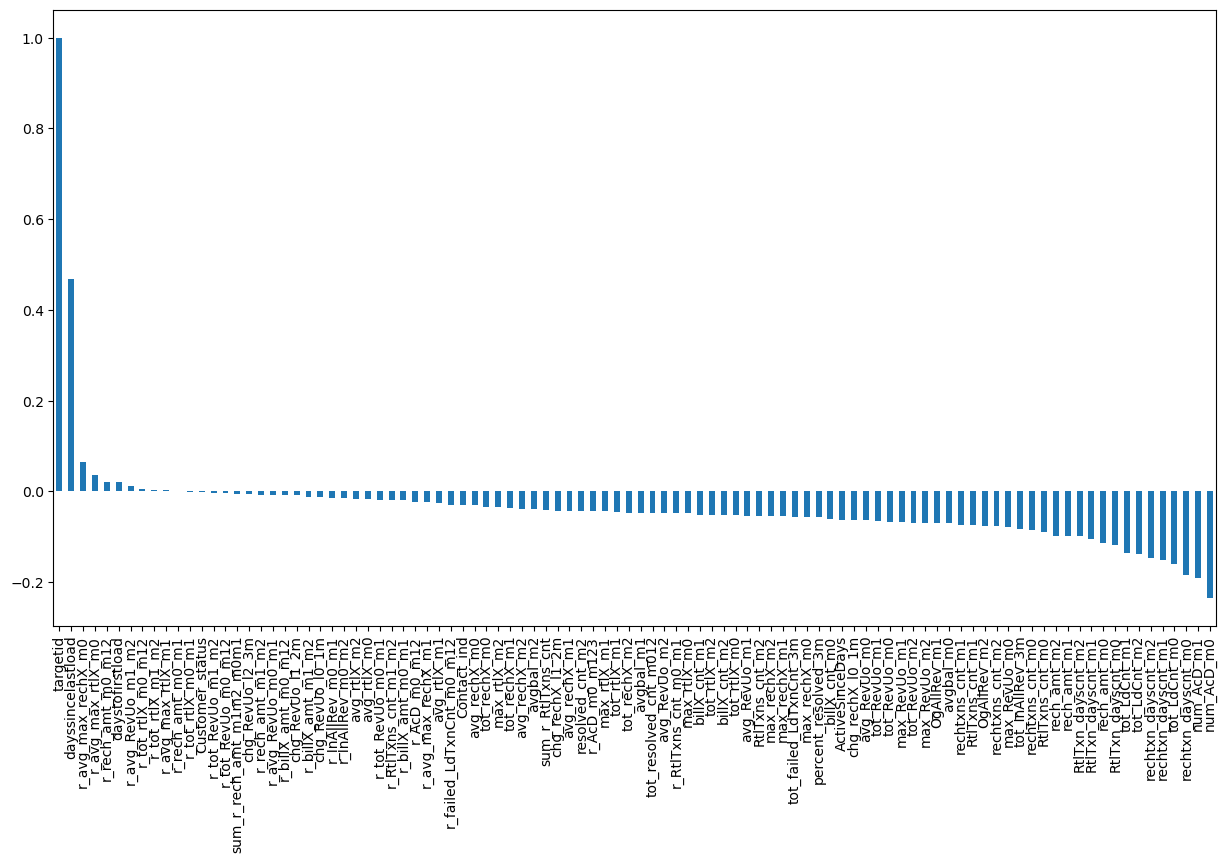

In [38]:
# Get Correlation of "churn" with other variables:
plt.figure(figsize=(15,8))
df[b].corr()['targetid'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [39]:
#### As Data is numercial lets check Distribution.
#for i in df_new.columns:
#    sns.displot(df_new, x=i, kde=True)

### Modelling

In [272]:
# Import Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

import time

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

#Split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

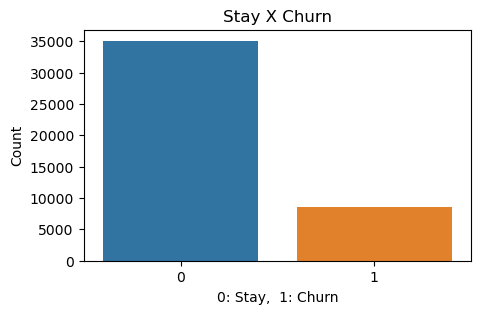

In [41]:
## Lets check if targetid is biased or not
# Comparing the number of people who will get churn or not
plt.figure(figsize=(10,8))
sns.barplot(data=df,x=df['targetid'].value_counts().index,y=df['targetid'].value_counts())
plt.title('Stay X Churn')
plt.ylabel('Count')
plt.xlabel('0: Stay,  1: Churn')
plt.gcf().set_size_inches(5,3)
plt.show()

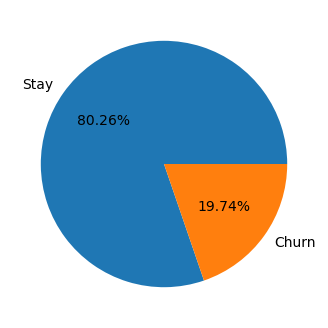

In [42]:
palette_color = sns.color_palette('bright')
plt.pie(df["targetid"].value_counts(),autopct='%.2f%%',labels=['Stay','Churn'])
plt.gcf().set_size_inches(4,4)
plt.show()

**From here it is quite cleared the data is biased for people who are staying. This can cause overfitting of a model and is not ideal . We can resolve this issue by under sampling or over sampling.**

* **Oversampling** — Duplicating samples from the minority class

* **Undersampling** — Deleting samples from the majority class.

### Applying the undersampling technique

In [43]:
#Setting seed values
np.random.seed(42)

In [44]:
# We have two Classes present here legit and fraud
stay=df[df['targetid']==0]
churn=df[df['targetid']==1]

In [45]:
stay.shape,churn.shape

((35081, 98), (8628, 98))

In [46]:
# lets make a new data set with equal amount of data set
stay_new = stay.sample(n=11372)
stay_new.shape

(11372, 98)

In [47]:
df_new= pd.concat([stay_new,churn],axis=0)

In [48]:
df_new.shape

(20000, 98)

In [49]:
# New data set first 5 rows
df_new.head()

Contact_ind  Customer_status  ActiveSinceDays  num_AcD_m0  num_AcD_m1  \
31215            1                3              422           4           6   
40839            1                3              425          10          11   
7113             1                3             1841           2           4   
42170            1                2             1030           3           2   
24505            1                2             1032           8           5   

       r_AcD_m0_m12  r_AcD_m0_m123  daystofirstload  dayssincelastload  \
31215     38.095238      27.272727                0                135   
40839    142.857143     176.470588              116                 10   
7113      66.666667     100.000000              483                 18   
42170    150.000000     225.000000              642                  7   
24505    114.285714     114.285714               11                 34   

       tot_RevUo_m0  ...   avgbal_m2  resolved_cnt_m2  tot_resolved_cnt_m012  \
31215          0.00  ...  169.005714                0                      0   
40839      12880.00  ...    5.357143                0                      0   
7113         100.00  ...  101.250000                0                      0   
42170      14000.00  ...    1.800000                0                      0   
24505      14182.65  ...  189.292857                0                      0   

       percent_resolved_3m  r_InAllRev_m0_m1  r_InAllRev_m0_m2  \
31215                  0.0         99.800399      1.094092e+01   
40839                  0.0         81.462273      1.288000e+06   
7113                   0.0         19.960080      1.000000e+04   
42170                  0.0        139.986001      1.272727e+05   
24505                  0.0         89.217478      4.310127e+01   

       tot_InAllRev_3m  OgAllRev_m1  OgAllRev_m2  targetid  
31215          5569.00        789.0       5687.0         0  
40839         28690.00      15630.0        247.0         0  
7113            600.00        580.0          0.0         0  
42170         24010.00      10000.0         10.0         0  
24505         85187.65      21405.0      44450.0         0  

[5 rows x 98 columns]

In [50]:
# New data set last 5 rows
df_new.tail()

Contact_ind  Customer_status  ActiveSinceDays  num_AcD_m0  num_AcD_m1  \
43689            1                3              301           2           1   
43709            1                4              152           1           2   
43715            1                4               82           1           1   
43716            1                0              547           3           2   
43717            1                3             1497           2           3   

       r_AcD_m0_m12  r_AcD_m0_m123  daystofirstload  dayssincelastload  \
43689     80.000000     120.000000                0                207   
43709     33.333333      33.333333               14                161   
43715    100.000000     150.000000                0                106   
43716     60.000000      64.285714               14                145   
43717    100.000000     120.000000             1301                 98   

       tot_RevUo_m0  ...    avgbal_m2  resolved_cnt_m2  tot_resolved_cnt_m012  \
43689           0.0  ...    69.656071                0                      0   
43709           0.0  ...     0.000000                0                      0   
43715           0.0  ...     0.000000                0                      0   
43716           0.0  ...  1216.904286                0                      0   
43717           0.0  ...     0.920000                0                      0   

       percent_resolved_3m  r_InAllRev_m0_m1  r_InAllRev_m0_m2  \
43689                  0.0               0.0               0.0   
43709                  0.0               0.0               0.0   
43715                  0.0               0.0               0.0   
43716                  0.0               0.0               0.0   
43717                  0.0               0.0               0.0   

       tot_InAllRev_3m  OgAllRev_m1  OgAllRev_m2  targetid  
43689             0.00          0.0       1126.0         1  
43709             0.00         40.0          0.0         1  
43715           857.00        857.0          0.0         1  
43716          2500.00        699.0       1729.0         1  
43717          1690.19       1960.0          0.0         1  

[5 rows x 98 columns]

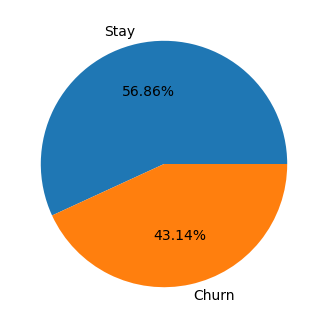

In [51]:
palette_color = sns.color_palette('bright')
plt.pie(df_new["targetid"].value_counts(),autopct='%.2f%%',labels=['Stay','Churn'])
plt.gcf().set_size_inches(4,4)
plt.show()

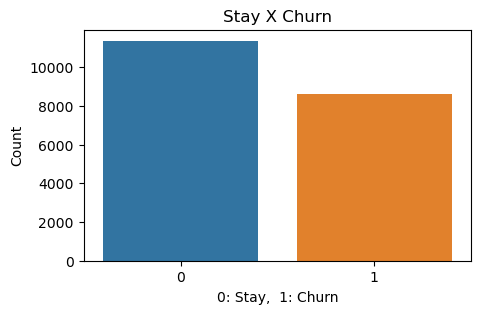

In [52]:
sns.barplot(data=df_new,x=df_new['targetid'].value_counts().index,y=df_new["targetid"].value_counts())
plt.title('Stay X Churn')
plt.ylabel('Count')
plt.xlabel('0: Stay,  1: Churn')
plt.gcf().set_size_inches(5,3)
plt.show()

***Now the data look balanced and not biased toward one end***

#### Training and Testing DATA

In [53]:
# Separation of input variables from target variable
X = df_new.drop(['targetid'],axis=1)
y = df_new['targetid']

In [54]:
X.head()

Contact_ind  Customer_status  ActiveSinceDays  num_AcD_m0  num_AcD_m1  \
31215            1                3              422           4           6   
40839            1                3              425          10          11   
7113             1                3             1841           2           4   
42170            1                2             1030           3           2   
24505            1                2             1032           8           5   

       r_AcD_m0_m12  r_AcD_m0_m123  daystofirstload  dayssincelastload  \
31215     38.095238      27.272727                0                135   
40839    142.857143     176.470588              116                 10   
7113      66.666667     100.000000              483                 18   
42170    150.000000     225.000000              642                  7   
24505    114.285714     114.285714               11                 34   

       tot_RevUo_m0  ...   avgbal_m1   avgbal_m2  resolved_cnt_m2  \
31215          0.00  ...   71.354194  169.005714                0   
40839      12880.00  ...  181.370968    5.357143                0   
7113         100.00  ...  106.846774  101.250000                0   
42170      14000.00  ...    1.800000    1.800000                0   
24505      14182.65  ...    8.159355  189.292857                0   

       tot_resolved_cnt_m012  percent_resolved_3m  r_InAllRev_m0_m1  \
31215                      0                  0.0         99.800399   
40839                      0                  0.0         81.462273   
7113                       0                  0.0         19.960080   
42170                      0                  0.0        139.986001   
24505                      0                  0.0         89.217478   

       r_InAllRev_m0_m2  tot_InAllRev_3m  OgAllRev_m1  OgAllRev_m2  
31215      1.094092e+01          5569.00        789.0       5687.0  
40839      1.288000e+06         28690.00      15630.0        247.0  
7113       1.000000e+04           600.00        580.0          0.0  
42170      1.272727e+05         24010.00      10000.0         10.0  
24505      4.310127e+01         85187.65      21405.0      44450.0  

[5 rows x 97 columns]

In [55]:
remain_columns = X.columns.to_list()

In [56]:
y.head()

31215    0
40839    0
7113     0
42170    0
24505    0
Name: targetid, dtype: int64

In [57]:
# Spliting the data into Train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 16000
X_test: 4000
y_train: 16000
y_test: 4000


### Standardizing the dataset

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
#Defining the modelling function
dic_fscore = {}
dic_accscore = {} 
dic_precision = {} 
dic_recall = {}
dic_roc = {}
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)
        roc_score = roc_auc_score(y_true, y_pred)
        print("f1_score: ",roc_score)
        dic_fscore[alg_name] = f_score
        dic_accscore[alg_name] = acc_score
        dic_precision[alg_name] = pre_score
        dic_recall[alg_name] = rec_score
        dic_roc[alg_name] = roc_score
    print_scores(alg, y_test, y_pred)
    
    
    cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj). 
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])

    #The plot() function has to be called for the sklearn visualization
    cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
    cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
    plt.gcf().set_size_inches(5,3)
    plt.show()
    
    return model

Start time: Fri Dec 16 16:27:53 2022
Logistic Regression
accuracy:  0.80425
precision:  0.755935946990613
recall:  0.8005847953216374
f1_score:  0.8048504980070778
f1_score:  0.803785847442478


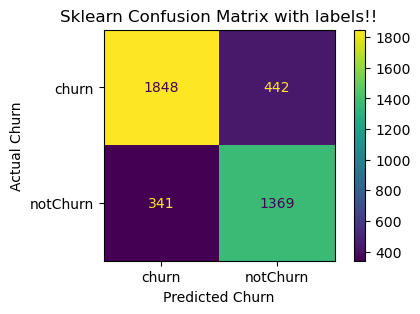

End time: Fri Dec 16 16:27:54 2022


In [60]:
# Running LogisticRegression model
print("Start time:", time.ctime())
LR_model = modeling(LogisticRegression, 'Logistic Regression')
print("End time:", time.ctime())

Start time: Fri Dec 16 16:27:54 2022
Random Forest
accuracy:  0.837
precision:  0.7906593406593406
recall:  0.8415204678362573
f1_score:  0.837534067215494
f1_score:  0.8375724609923645


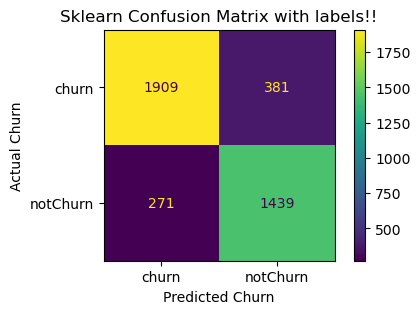

End time: Fri Dec 16 16:28:00 2022


In [61]:
# Running RandomForestClassifier model
print("Start time:", time.ctime())
RF_model = modeling(RandomForestClassifier, 'Random Forest')
print("End time:", time.ctime())

Start time: Fri Dec 16 16:28:00 2022
Light GBM
accuracy:  0.848
precision:  0.7828542094455853
recall:  0.8918128654970761
f1_score:  0.8487789563657729
f1_score:  0.8535483541459179


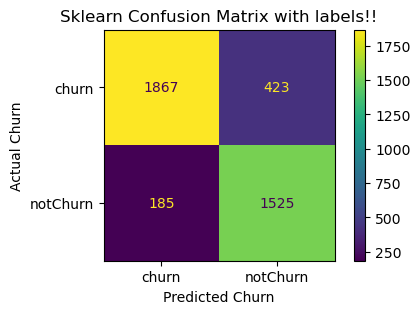

End time: Fri Dec 16 16:28:00 2022


In [62]:
# LightGBM model
print("Start time:", time.ctime())
LGBM_model = modeling(lgb.LGBMClassifier, 'Light GBM')
print("End time:", time.ctime())

Start time: Fri Dec 16 16:28:00 2022
Decision Tree Classification
accuracy:  0.78575
precision:  0.7531157270029674
recall:  0.7421052631578947
f1_score:  0.7855427250587264
f1_score:  0.7802229372558032


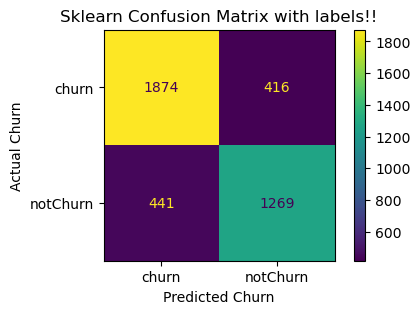

End time: Fri Dec 16 16:28:02 2022


In [63]:
#Decision tree
print("Start time:", time.ctime())
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")
print("End time:", time.ctime())

Start time: Fri Dec 16 16:28:02 2022
Naive Bayes Classification
accuracy:  0.53325
precision:  0.4759128567045106
recall:  0.9070175438596492
f1_score:  0.48673376152867015
f1_score:  0.5805830077376848


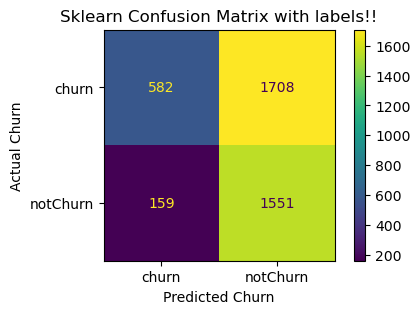

End time: Fri Dec 16 16:28:02 2022


In [64]:
#Naive bayes 
print("Start time:", time.ctime())
nb_model = modeling(GaussianNB, "Naive Bayes Classification")
print("End time:", time.ctime())

Start time: Fri Dec 16 16:28:02 2022
Ada Boost Classifier
accuracy:  0.84375
precision:  0.7700348432055749
recall:  0.9046783625730994
f1_score:  0.8445745673382246
f1_score:  0.8514658188411348


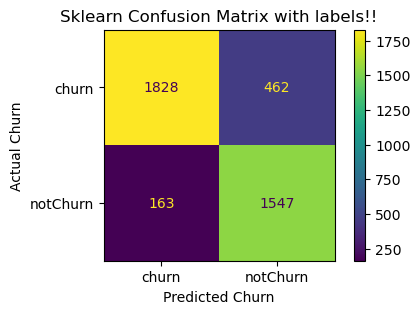

End time: Fri Dec 16 16:28:06 2022


In [65]:
# Ada Boost
print("Start time:", time.ctime())
ada_model=modeling(AdaBoostClassifier, "Ada Boost Classifier")
print("End time:", time.ctime())

Start time: Fri Dec 16 16:28:06 2022
Gradient Boosting Classifier
accuracy:  0.84975
precision:  0.7776664997496244
recall:  0.908187134502924
f1_score:  0.8505439269113382
f1_score:  0.857150335810414


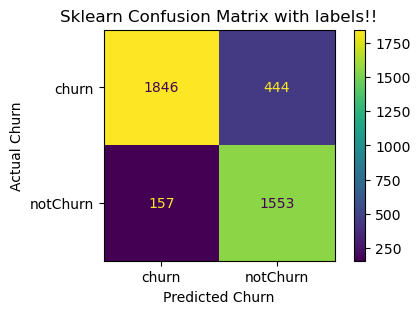

End time: Fri Dec 16 16:28:26 2022


In [66]:
# Gradient Boosting
print("Start time:", time.ctime())
gbm_model=modeling(GradientBoostingClassifier, "Gradient Boosting Classifier")
print("End time:", time.ctime())

Start time: Fri Dec 16 16:28:26 2022
[16:28:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier
accuracy:  0.84425
precision:  0.7886351566648965
recall:  0.868421052631579
f1_score:  0.8449425773749741
f1_score:  0.8473109629970121


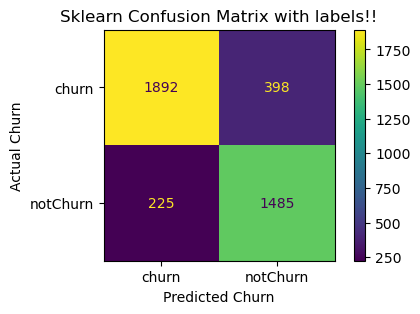

End time: Fri Dec 16 16:28:30 2022


In [67]:
# XG Boost
print("Start time:", time.ctime())
XGB_model=modeling(XGBClassifier, "XG Boost Classifier")
print("End time:", time.ctime())

### Accoring to the Question we are to take F1-score into consideration



### Model Scores Evaluation

In [68]:
dic_fscore

{'Logistic Regression': 0.8048504980070778,
 'Random Forest': 0.837534067215494,
 'Light GBM': 0.8487789563657729,
 'Decision Tree Classification': 0.7855427250587264,
 'Naive Bayes Classification': 0.48673376152867015,
 'Ada Boost Classifier': 0.8445745673382246,
 'Gradient Boosting Classifier': 0.8505439269113382,
 'XG Boost Classifier': 0.8449425773749741}

In [69]:
dic_accscore

{'Logistic Regression': 0.80425,
 'Random Forest': 0.837,
 'Light GBM': 0.848,
 'Decision Tree Classification': 0.78575,
 'Naive Bayes Classification': 0.53325,
 'Ada Boost Classifier': 0.84375,
 'Gradient Boosting Classifier': 0.84975,
 'XG Boost Classifier': 0.84425}

In [70]:
dic_recall

{'Logistic Regression': 0.8005847953216374,
 'Random Forest': 0.8415204678362573,
 'Light GBM': 0.8918128654970761,
 'Decision Tree Classification': 0.7421052631578947,
 'Naive Bayes Classification': 0.9070175438596492,
 'Ada Boost Classifier': 0.9046783625730994,
 'Gradient Boosting Classifier': 0.908187134502924,
 'XG Boost Classifier': 0.868421052631579}

In [71]:
dic_precision

{'Logistic Regression': 0.755935946990613,
 'Random Forest': 0.7906593406593406,
 'Light GBM': 0.7828542094455853,
 'Decision Tree Classification': 0.7531157270029674,
 'Naive Bayes Classification': 0.4759128567045106,
 'Ada Boost Classifier': 0.7700348432055749,
 'Gradient Boosting Classifier': 0.7776664997496244,
 'XG Boost Classifier': 0.7886351566648965}

In [72]:
dic_roc

{'Logistic Regression': 0.803785847442478,
 'Random Forest': 0.8375724609923645,
 'Light GBM': 0.8535483541459179,
 'Decision Tree Classification': 0.7802229372558032,
 'Naive Bayes Classification': 0.5805830077376848,
 'Ada Boost Classifier': 0.8514658188411348,
 'Gradient Boosting Classifier': 0.857150335810414,
 'XG Boost Classifier': 0.8473109629970121}

In [73]:
model_list = [dic_accscore,dic_fscore,dic_precision,dic_recall,dic_roc]
Titles = ['Accuracy','F-Score','Precison','Recall','ROC']

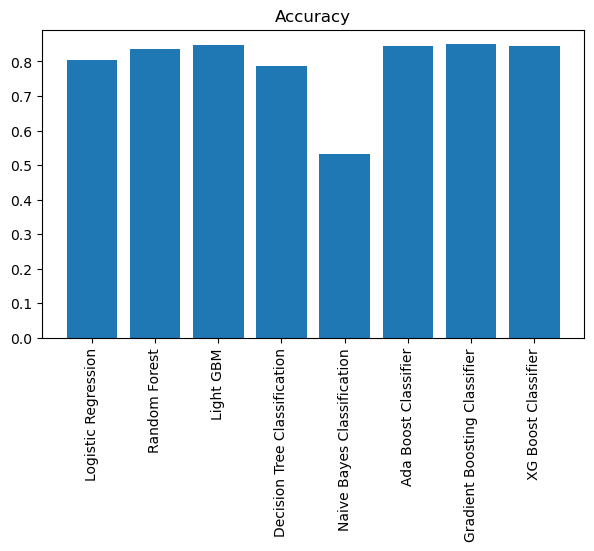

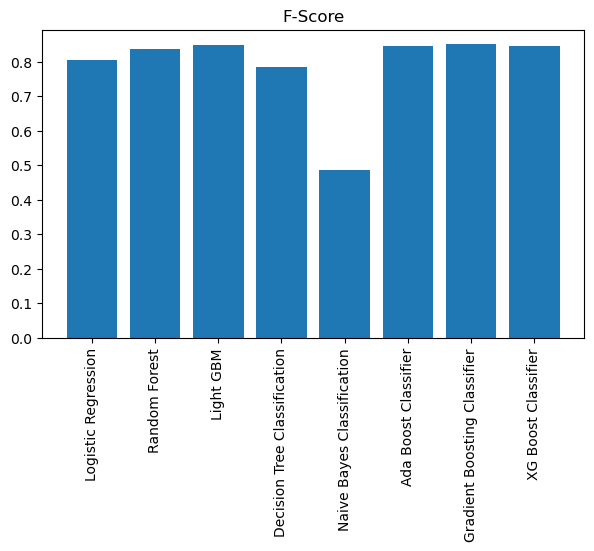

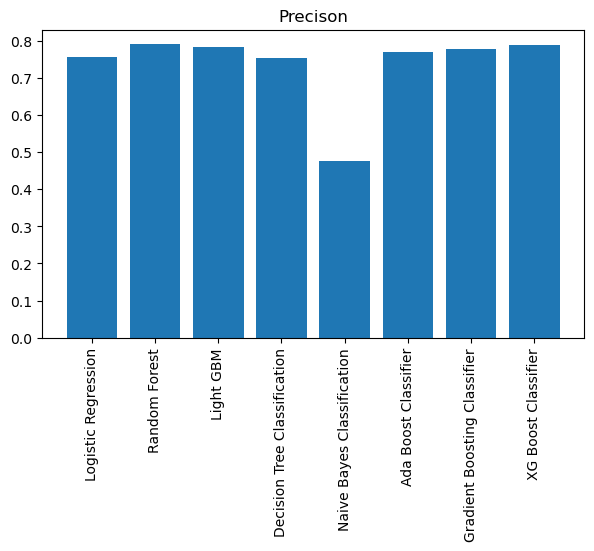

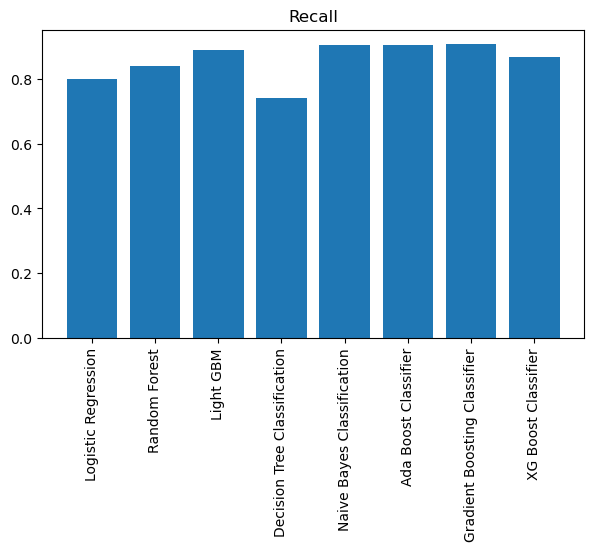

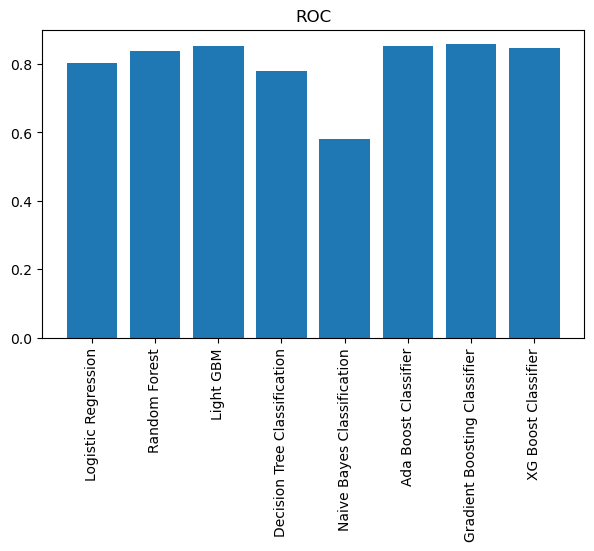

In [74]:
for i in range(len(Titles)):
    names = list(model_list[i].keys())
    values = list(model_list[i].values())
    plt.bar(range(len(model_list[i])), values, tick_label=names)
    plt.xticks(rotation = 90)
    plt.title(Titles[i])
    plt.gcf().set_size_inches(7,4)
    plt.show()

### From Above Info we got an Idea About the Following
* Highest Accuracy:Gradient Boosting Classifier
* Highest Precision:Random Forest
* Highest Recall:Gradient Boosting Classifier
* Highest F-Score:Gradient Boosting Classifier
* Highest ROC:Gradient Boosting Classifier

***Now we will work with Gradient Boosting Classifier***

### Tuning of the model for better accuracy

In [184]:
from sklearn.model_selection import RandomizedSearchCV
lgbm_params = {'n_estimators': [100, 500, 1000],
                'subsample': [0.6, 0.8, 1.0],
                'max_depth': [3, 4, 5],
                'learning_rate': [0.1,0.01,0.02],
                "min_child_samples": [5,10,20]}

In [186]:
# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(estimator=lgb.LGBMClassifier(), param_distributions=lgbm_params, cv = 5, n_iter=100,verbose=1)

In [187]:
rs_cv.fit(X_train,y_train,verbose=1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.02],
                                        'max_depth': [3, 4, 5],
                                        'min_child_samples': [5, 10, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=1)

In [188]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [189]:
# GridSearhCV() for the cross-validation
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
print("Start time:", time.ctime())

Start time: Fri Dec 16 18:45:47 2022


In [190]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [212]:
print("End time:", time.ctime())

End time: Sat Dec 17 09:57:15 2022


In [191]:
rs_cv.best_params_, rs_cv.best_score_

({'subsample': 0.6,
  'n_estimators': 1000,
  'min_child_samples': 20,
  'max_depth': 5,
  'learning_rate': 0.01},
 0.8556250000000001)

***LGBMClassifier Boost Details***
#### Evaluation Metrics for model training : ROC-AUC [which tells how much the model has learnt to distinguish between two classes of the target feature]

In [214]:
print('LGBMClassifier  Best_paramneter :\n',rs_cv.best_params_,"\n")
print('LGBMClassifier  Best_score :\n',rs_cv.best_score_)

LGBMClassifier  Best_paramneter :
 {'subsample': 0.6, 'n_estimators': 1000, 'min_child_samples': 20, 'max_depth': 5, 'learning_rate': 0.01} 

LGBMClassifier  Best_score :
 0.8556250000000001


In [215]:
y_pred = cv.predict(X_test)
print('LGBMClassifier classification_report :\n')
print(classification_report(y_test, y_pred))

LGBMClassifier classification_report :

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2290
           1       0.78      0.91      0.84      1710

    accuracy                           0.85      4000
   macro avg       0.85      0.86      0.85      4000
weighted avg       0.86      0.85      0.85      4000



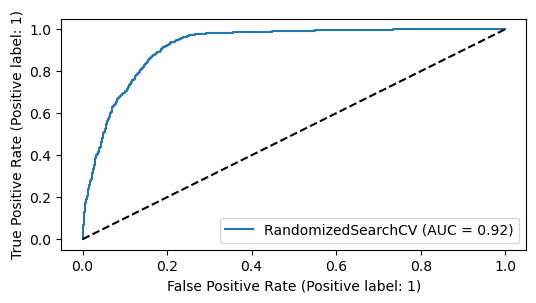

In [280]:
plot_roc_curve(rs_cv, X_test, y_test)
plt.plot([0,1], [0,1], 'k--' )
plt.gcf().set_size_inches(6,3)
plt.show()

***Gradient Boost Details***
#### Evaluation Metrics for model training : ROC-AUC [which tells how much the model has learnt to distinguish between two classes of the target feature]

In [216]:
print('GradientBoostingClassifier Best_paramneter :\n',cv.best_params_,"\n")
print('GradientBoostingClassifier Best_score :\n',cv.best_score_)

GradientBoostingClassifier Best_paramneter :
 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500} 

GradientBoostingClassifier Best_score :
 0.8546875


In [217]:
y_pred = rs_cv.predict(X_test)
print('GradientBoostingClassifier classification_report :\n')
print(classification_report(y_test, y_pred))

GradientBoostingClassifier classification_report :

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2290
           1       0.78      0.90      0.84      1710

    accuracy                           0.85      4000
   macro avg       0.85      0.86      0.85      4000
weighted avg       0.86      0.85      0.85      4000



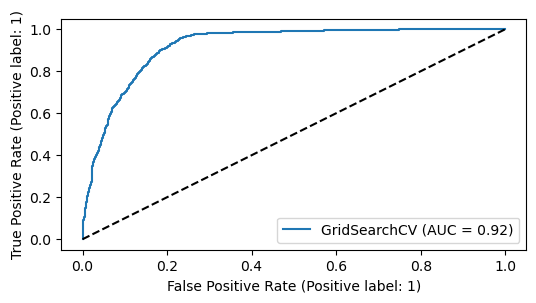

In [279]:
plot_roc_curve(cv, X_test, y_test)
plt.plot([0,1], [0,1], 'k--' )
plt.gcf().set_size_inches(6,3)
plt.show()

##  Coming to Validation File

In [252]:
df_val = pd.read_excel('validation.xlsx')

In [255]:
type(df_val)

pandas.core.frame.DataFrame

In [256]:
LGBM_DataFrame = pd.DataFrame(df_val['userID'])
GB_DataFrame = pd.DataFrame(df_val['userID'])

In [259]:
df_val.drop(["userID"], axis = 1, inplace=True)

In [260]:
df_val[misssing_col] = df_val[misssing_col].fillna(df_val[misssing_col].mean())

In [261]:
# Features with missing values
miss = df_val.isnull().sum().sort_values(ascending = False).head(5)
miss_per = (miss/len(df_val))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

No. missing values  % of missing data
Contact_ind                          0                0.0
r_avg_max_rechX_m1                   0                0.0
r_billX_amt_m0_m1                    0                0.0
tot_billX_amt_m012                   0                0.0
billX_amt_m2                         0                0.0

In [262]:
df_val = df_val[df_val.columns.intersection(remain_columns)]

In [263]:
df_val.shape

(5000, 97)

In [264]:
df_val = sc.fit_transform(df_val)

In [265]:
result1 = cv.predict(df_val)

In [266]:
result2 = rs_cv.predict(df_val)

In [267]:
type(LGBM_DataFrame)

pandas.core.frame.DataFrame

In [268]:
LGBM_DataFrame['targetid'] = result2

In [269]:
GB_DataFrame['targetid'] = result1

In [ ]:
Result_DataFrame['targetid'].value_counts()

### Exporting the Required Result as CSV

In [271]:
LGBM_DataFrame.to_csv('LGBM_RESULT.csv', encoding='utf-8',index=False)
GB_DataFrame.to_csv('GB_RESULT.csv', encoding='utf-8',index=False)

## Summary

* First we did some Eda and preprocessing on the Data Set.
* Columns Removed that have constant Values and have corelation of greater than 0.95 among eachother.
* Removed userid column as that will not be useful for Training.
* We checked the outliers using box plot.
* Removed duplicate values.
* The Data is Biased toward people who will stay.
* Made the Data Balanced while training with 57 to 43 ratio.
* Trained on multiple Algos best two were taken into consideration on the basis of f-score.
* Did HyperParameter Tuning on the Algos
* Did Standardized the dataset before training
* Worked on Validation sheet and got the predicted target values.

***Answers shared with RESULT.csv file for both the finalized Algorithms.***

# Points to be considered:
* It is more important to understand what proportion of actual positives were identified correctly (recall) rather than what proportion of positive identifications were correct (precision).
* Improving recall percentage and reducing Type II errors is important for to retain customer and the revenue
* Recall of around 0.90 means that the model was able to catch abont 90% of the actual Churn cases. This is the measure we really care about, because we want to miss as few of the true Churn cases as possible.

## F1 Score
* The F1 Score is the harmonic mean of Precision and Recall. It helps give us a balanced idea of how the model is performing on the Churn class. In this case a Churn Class F1 Score of near 0.85 is pretty good.

* After the Type II error customers have been identified, the company should invest in variable to entice these customers to stay
* It may be easier to get these customers to stay compared to those that were accurately predicted to churn outright.

#### ROC Curve is at 92% Accurcay meaning our Model is able to prdeict atleast 92 out of the 100 inputs correctly